In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from sbifitter import SBI_Fitter
import numpy as np
import torch
from synthesizer.emission_models import (
    PacmanEmission,
    TotalEmission,
    EmissionModel,
    IntrinsicEmission,
)
from synthesizer.emission_models.attenuation import PowerLaw, Calzetti2000
from synthesizer.grid import Grid
from synthesizer.parametric import SFH, ZDist
from synthesizer.instruments import Instrument, FilterCollection, Filter
from unyt import Myr, erg, Hz, s
from astropy.cosmology import Planck18
from astropy import units as u
from unyt import Jy

grid_path = "/home/tharvey/work/output/grid_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1.hdf5"

Device: cuda
Pytorch version: 2.4.1
ROCM HIP version: 6.1.40093-e3dc58bf0


In [2]:
fitter = SBI_Fitter.init_from_hdf5(
    "Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe",
    grid_path,
    return_output=False,
)

fitter.create_feature_array_from_raw_photometry(
    extra_features=[], normalize_method=None
);

---------------------------------------------
Features: 100000 features over 20 samples
---------------------------------------------
Feature: Min - Max
---------------------------------------------
NIRCam.F070W: 21.384 - 50.000 AB
NIRCam.F090W: 19.759 - 50.000 AB
NIRCam.F115W: 19.533 - 50.000 AB
NIRCam.F140M: 19.640 - 50.000 AB
NIRCam.F150W: 19.666 - 42.887 AB
NIRCam.F162M: 19.382 - 41.489 AB
NIRCam.F182M: 19.386 - 41.191 AB
NIRCam.F200W: 19.375 - 41.193 AB
NIRCam.F210M: 19.360 - 41.262 AB
NIRCam.F250M: 19.415 - 40.193 AB
NIRCam.F277W: 19.419 - 39.720 AB
NIRCam.F300M: 19.431 - 39.453 AB
NIRCam.F335M: 18.688 - 39.107 AB
NIRCam.F356W: 19.162 - 38.960 AB
NIRCam.F360M: 18.896 - 38.955 AB
NIRCam.F410M: 19.350 - 38.677 AB
NIRCam.F430M: 18.503 - 38.605 AB
NIRCam.F444W: 19.162 - 38.420 AB
NIRCam.F460M: 18.377 - 38.405 AB
NIRCam.F480M: 19.062 - 38.008 AB
---------------------------------------------


Let's set up a 6 network model ensemble with both MDN and MAF models, with a range of hidden features. 


Notes

Learning rate 1e-5 took ~8 hours to train all nets, typically >1000 epochs each  
1e-3 took ~ 1 hour, typically ~200 epochs each

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 2.


Splitting dataset with 100000 samples into training and testing sets with 0.80 train fraction.
---------------------------------------------
Prior ranges:
---------------------------------------------
redshift: 5.00 - 12.00
log_mass: 6.00 - 11.50
sps_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1/tau_v: 0.00 - 2.00
sps_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1/tau: 0.05 - 2.50
sps_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1/peak_age: 0.00 - 990.40
sps_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1/log10metallicity: -3.00 - -1.39
---------------------------------------------
Creating mdn network with NPE engine and lampe backend.
     hidden_features: 50
     num_components: 5
Creating mdn network with NPE engine and lampe backend.
     hidden_features: 75
     num_components: 5
IndependentUniform(Uniform(low: torch.Size([6]), high: torch.Size([6])), 1)
[2025-05-15 15:23:10,322] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto

216 epochs [07:25,  2.06s/ epochs, loss=-1.13, loss_val=-1.51]    
INFO:root:Training model 2 / 2.
264 epochs [09:03,  2.06s/ epochs, loss=-2.08, loss_val=-2.31]  
INFO:root:It took 989.0812509059906 seconds to train models.
INFO:root:Saving model to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe
INFO:root:Sampling models with [306, 694] samples each.


Time to train model(s): 0:16:29.095395


Drawing 306 posterior samples: 530it [00:00, 76132.10it/s]            
Drawing 694 posterior samples: 1256it [00:00, 622626.86it/s]          
INFO:root:Saving single posterior plot to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe/plots/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe_35834_plot_single_posterior.jpg...
100%|██████████| 20000/20000 [01:03<00:00, 316.48it/s]
INFO:root:Saving coverage plot to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe/plots/plot_coverage.jpg...
INFO:root:Saving ranks histogram to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe/plots/ranks_histogram.jpg...
INFO:root:Mean logprob: 1.1488e+00Median logprob: 1.7231e+00
INFO:root:Saving true logprobs to /home/tharvey/work/ltu-ili_testing/models/Pop

(LampeEnsemble(
   (posteriors): ModuleList(
     (0): LampeNPE(
       (nde): NPE(
         (flow): GMM(
           (hyper): MLP(
             (0): Linear(in_features=20, out_features=50, bias=True)
             (1): ReLU()
             (2): Linear(in_features=50, out_features=50, bias=True)
             (3): ReLU()
             (4): Linear(in_features=50, out_features=50, bias=True)
             (5): ReLU()
             (6): Linear(in_features=50, out_features=140, bias=True)
           )
         )
       )
       (embedding_net): Identity()
     )
     (1): LampeNPE(
       (nde): NPE(
         (flow): GMM(
           (hyper): MLP(
             (0): Linear(in_features=20, out_features=75, bias=True)
             (1): ReLU()
             (2): Linear(in_features=75, out_features=75, bias=True)
             (3): ReLU()
             (4): Linear(in_features=75, out_features=75, bias=True)
             (5): ReLU()
             (6): Linear(in_features=75, out_features=140, bias=True)
    

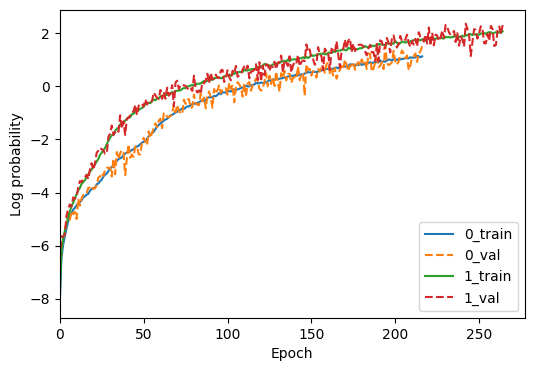

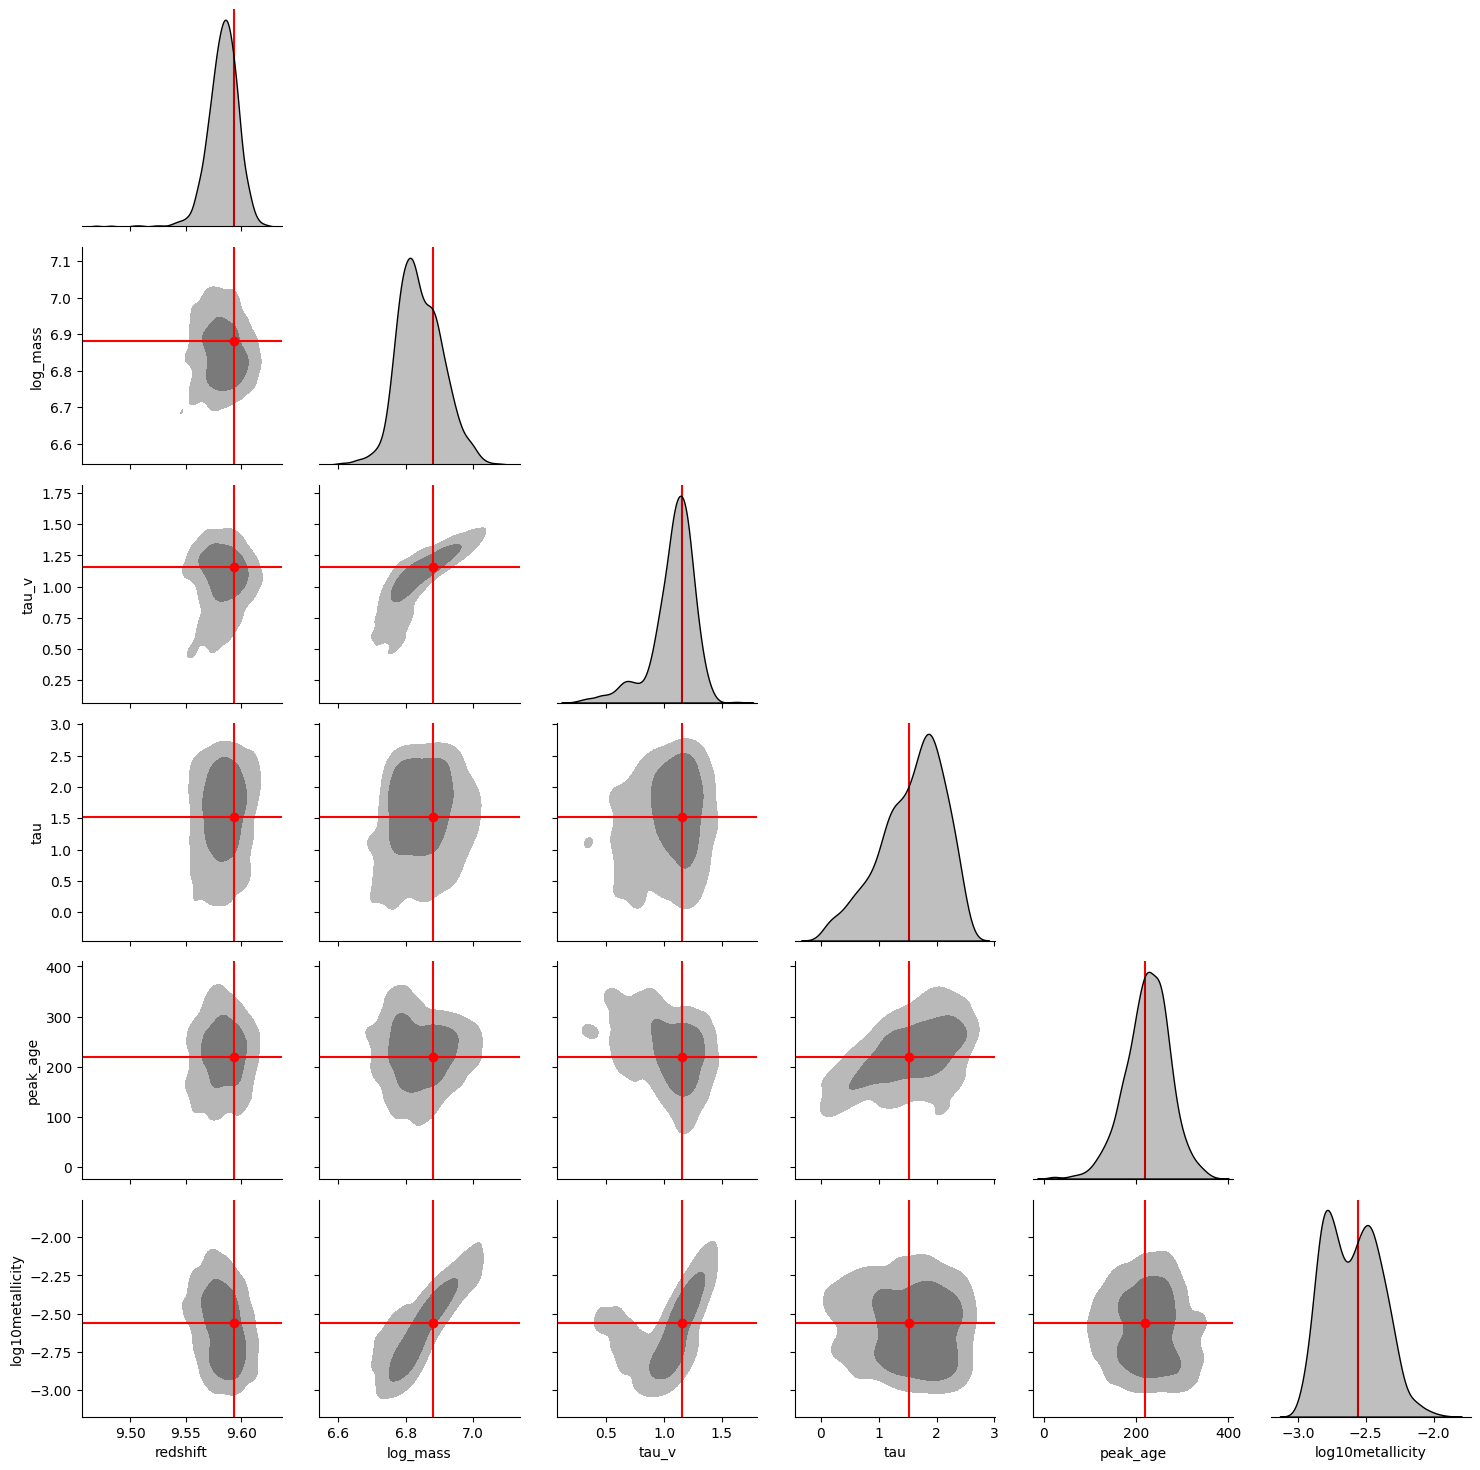

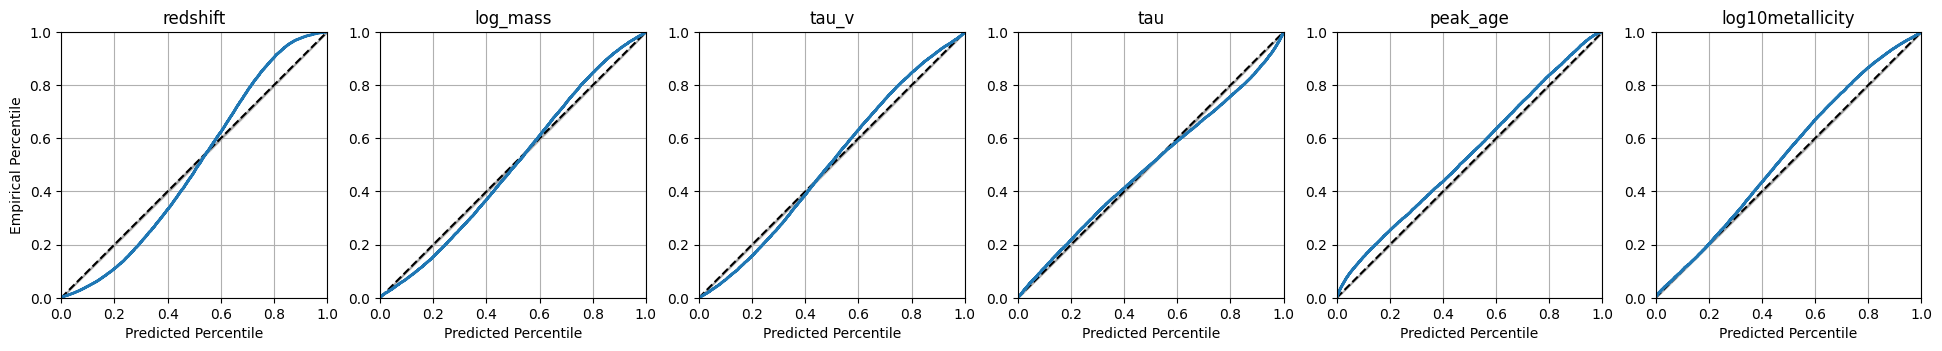

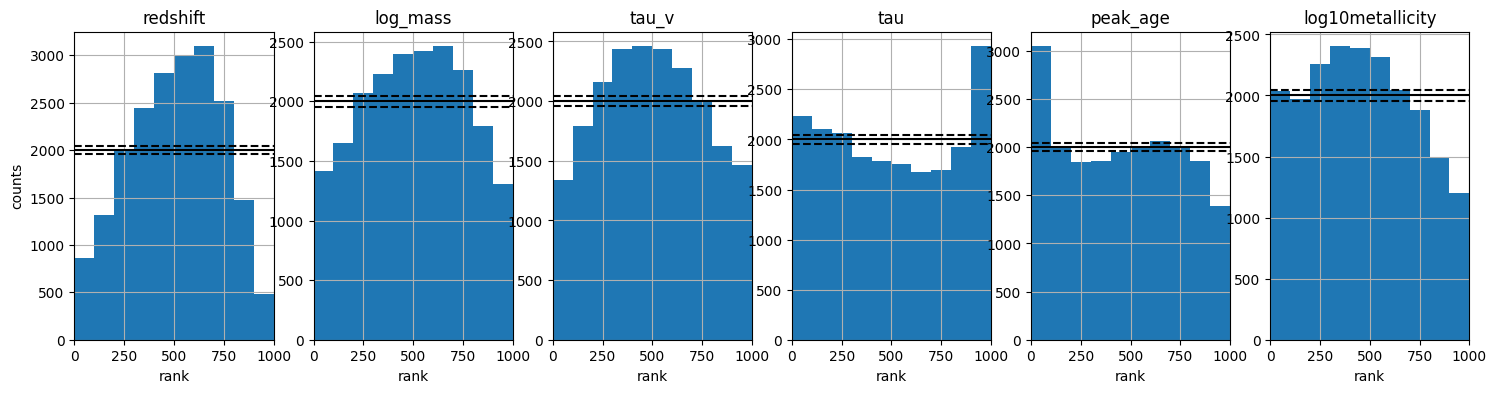

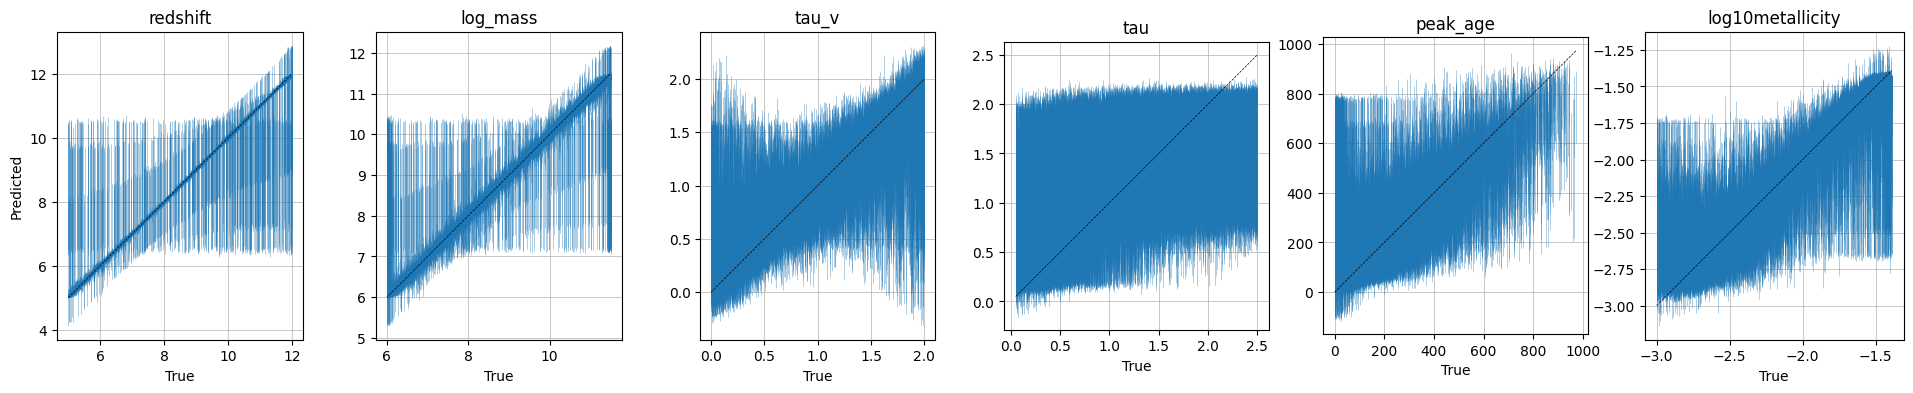

INFO:matplotlib.mathtext:Substituting symbol E from STIXNonUnicode


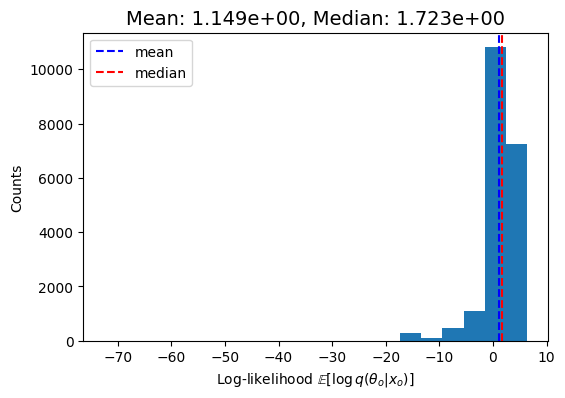

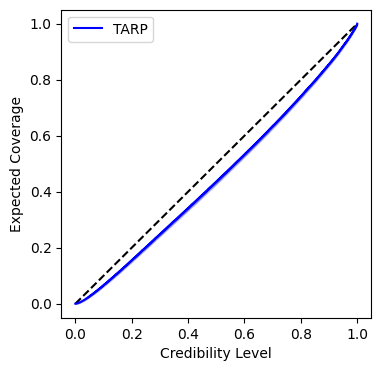

In [6]:
fitter.run_single_sbi(
    n_nets=2,
    backend="lampe",
    engine="NPE",
    stop_after_epochs=20,
    hidden_features=[50, 75],
    learning_rate=1e-3,
    num_transforms=5,
    num_components=5,
    model_type=["mdn", "mdn"],
)

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 2.


---------------------------------------------
Features: 100000 features over 20 samples
---------------------------------------------
Feature: Min - Max
---------------------------------------------
NIRCam.F070W: 21.384 - 50.000 AB
NIRCam.F090W: 19.759 - 50.000 AB
NIRCam.F115W: 19.533 - 50.000 AB
NIRCam.F140M: 19.640 - 50.000 AB
NIRCam.F150W: 19.666 - 42.887 AB
NIRCam.F162M: 19.382 - 41.489 AB
NIRCam.F182M: 19.386 - 41.191 AB
NIRCam.F200W: 19.375 - 41.193 AB
NIRCam.F210M: 19.360 - 41.262 AB
NIRCam.F250M: 19.415 - 40.193 AB
NIRCam.F277W: 19.419 - 39.720 AB
NIRCam.F300M: 19.431 - 39.453 AB
NIRCam.F335M: 18.688 - 39.107 AB
NIRCam.F356W: 19.162 - 38.960 AB
NIRCam.F360M: 18.896 - 38.955 AB
NIRCam.F410M: 19.350 - 38.677 AB
NIRCam.F430M: 18.503 - 38.605 AB
NIRCam.F444W: 19.162 - 38.420 AB
NIRCam.F460M: 18.377 - 38.405 AB
NIRCam.F480M: 19.062 - 38.008 AB
---------------------------------------------
Splitting dataset with 100000 samples into training and testing sets with 0.80 train fraction.


169 epochs [10:32,  3.74s/ epochs, loss=-2.98, loss_val=-2.87]   
INFO:root:Training model 2 / 2.
168 epochs [07:27,  2.67s/ epochs, loss=-2.73, loss_val=-1.82]   
INFO:root:It took 1080.6295387744904 seconds to train models.
INFO:root:Saving model to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe_maf
INFO:root:Sampling models with [621, 379] samples each.


Time to train model(s): 0:18:00.645276


Drawing 621 posterior samples: 773it [00:00, 77776.64it/s]            
Drawing 379 posterior samples: 445it [00:00, 71528.52it/s]            
INFO:root:Saving single posterior plot to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe_maf/plots/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe_maf_76007_plot_single_posterior.jpg...
100%|██████████| 20000/20000 [05:27<00:00, 61.13it/s]
INFO:root:Saving coverage plot to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe_maf/plots/plot_coverage.jpg...
INFO:root:Saving ranks histogram to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe_maf/plots/ranks_histogram.jpg...
INFO:root:Mean logprob: -2.6414e+00Median logprob: 1.6430e+00
INFO:root:Saving true logprobs to /home/tharvey/work/ltu-ili_te

(LampeEnsemble(
   (posteriors): ModuleList(
     (0): LampeNPE(
       (nde): NPE(
         (flow): MAF(
           (transform): LazyComposedTransform(
             (0): MaskedAutoregressiveTransform(
               (base): MonotonicAffineTransform()
               (order): [0, 1, 2, 3, 4, 5]
               (hyper): MaskedMLP(
                 (0): MaskedLinear(in_features=26, out_features=50, bias=True)
                 (1): ReLU()
                 (2): MaskedLinear(in_features=50, out_features=50, bias=True)
                 (3): ReLU()
                 (4): MaskedLinear(in_features=50, out_features=12, bias=True)
               )
             )
             (1): MaskedAutoregressiveTransform(
               (base): MonotonicAffineTransform()
               (order): [5, 4, 3, 2, 1, 0]
               (hyper): MaskedMLP(
                 (0): MaskedLinear(in_features=26, out_features=50, bias=True)
                 (1): ReLU()
                 (2): MaskedLinear(in_features=50, out_fea

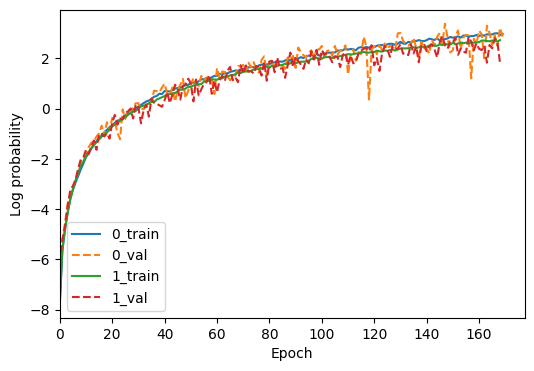

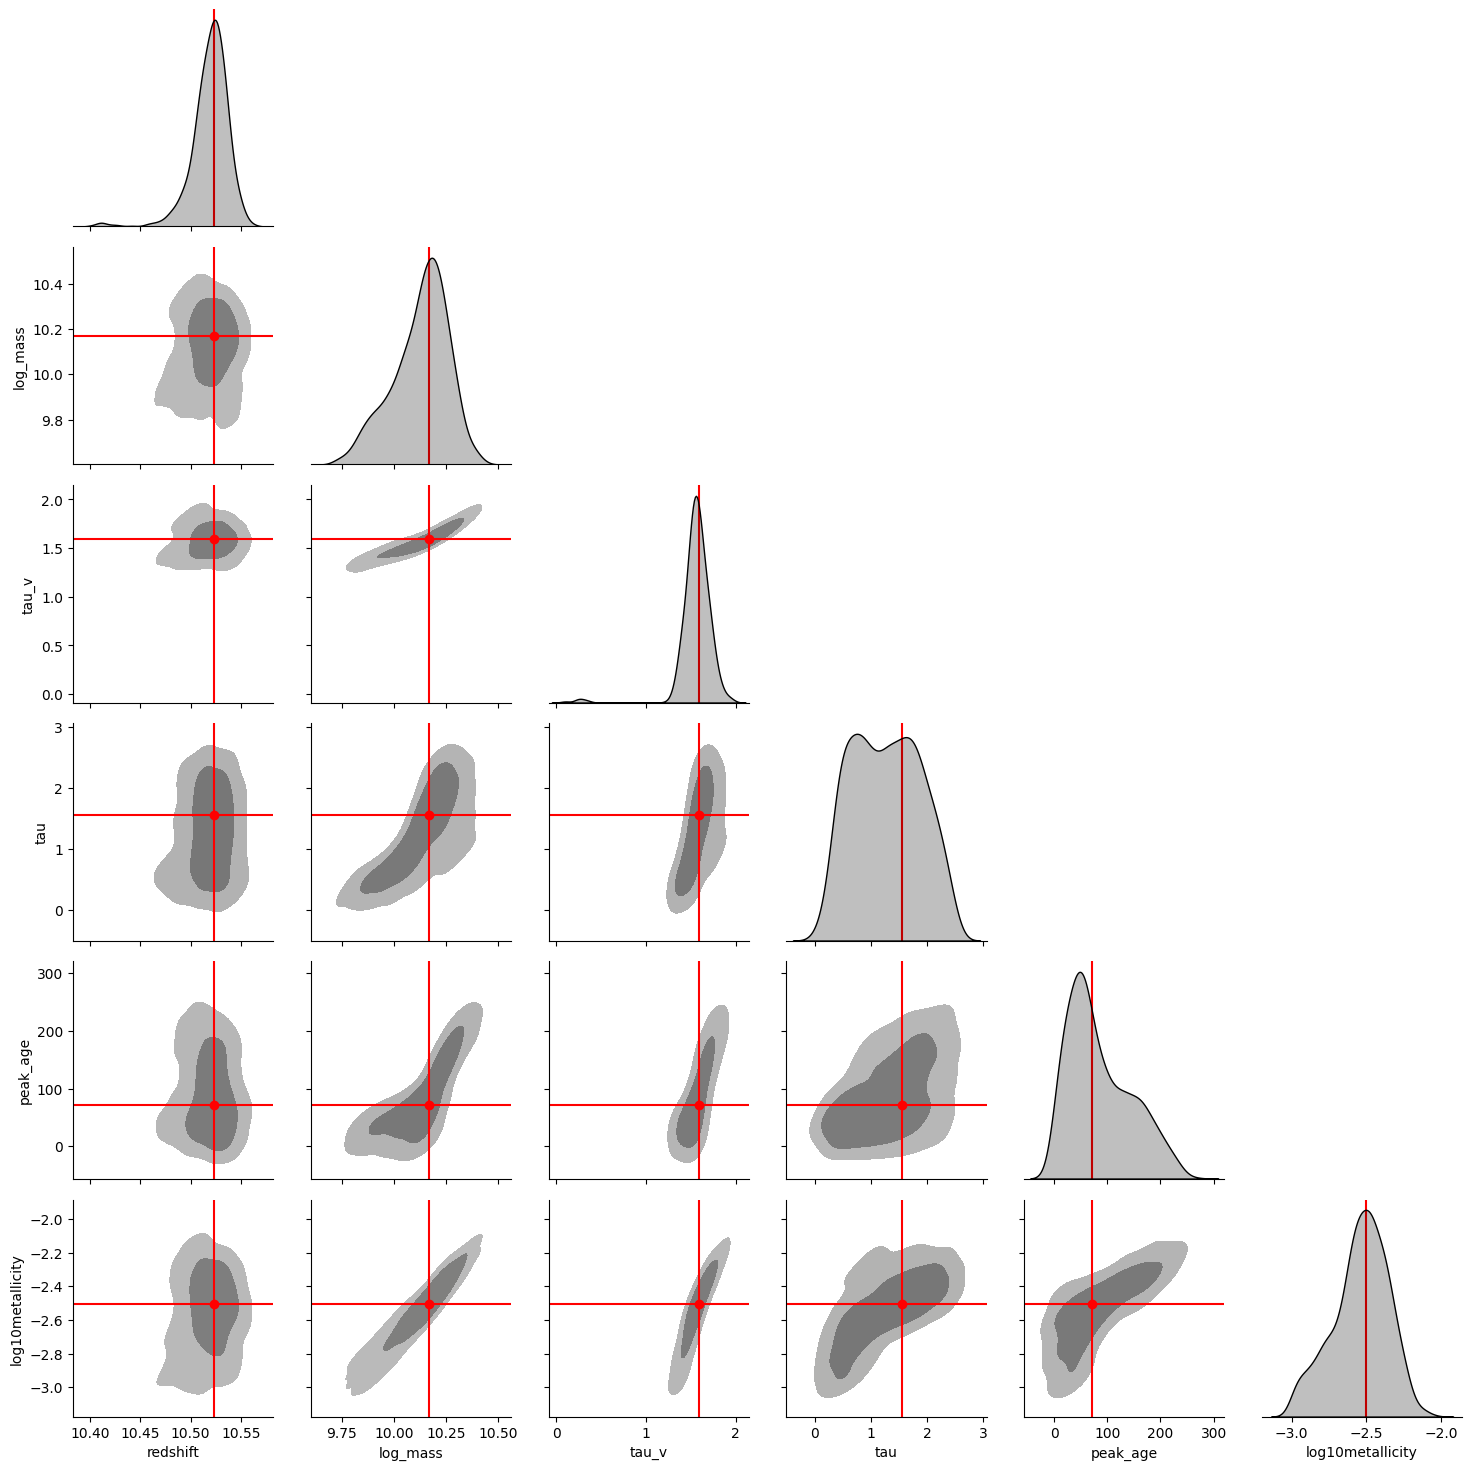

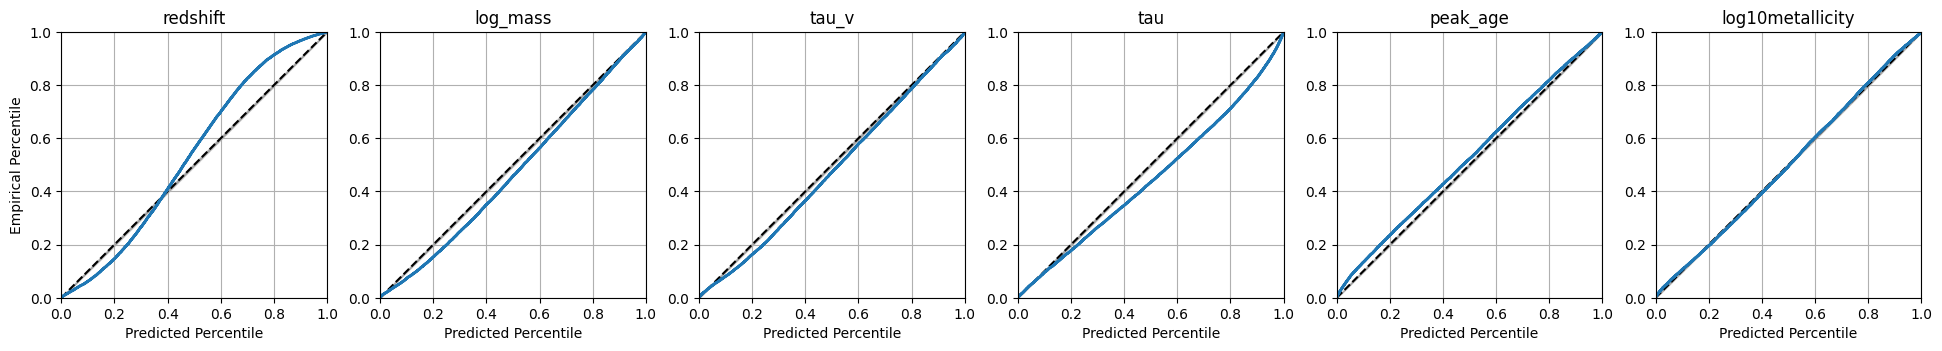

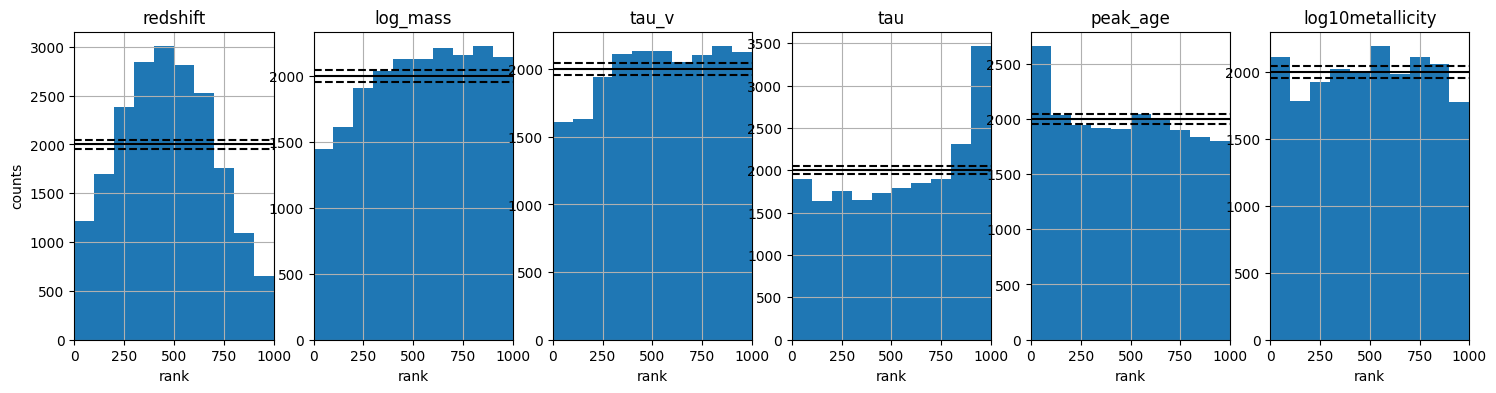

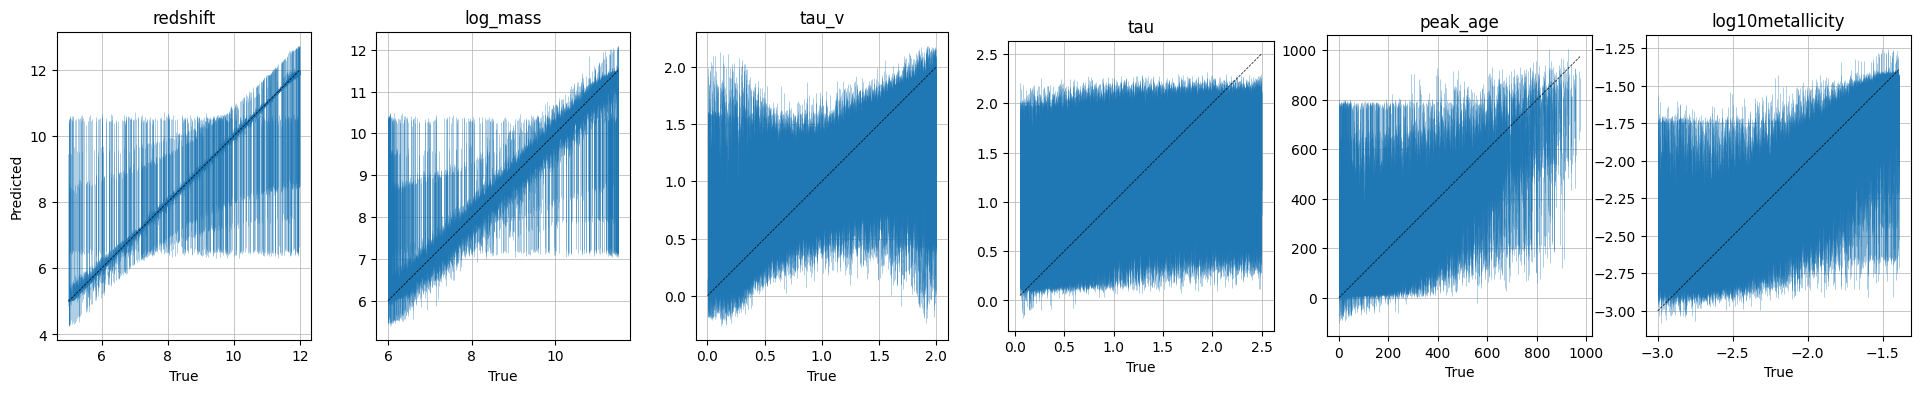

INFO:matplotlib.mathtext:Substituting symbol E from STIXNonUnicode


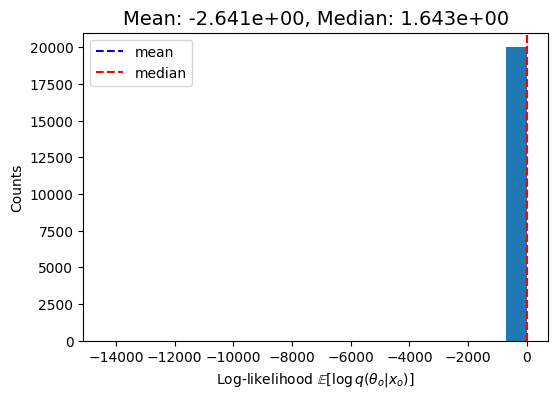

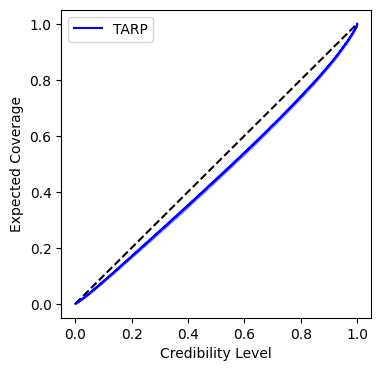

In [7]:
fitter = SBI_Fitter.init_from_hdf5(
    "Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe_maf",
    grid_path,
    return_output=False,
)

fitter.create_feature_array_from_raw_photometry(
    extra_features=[], normalize_method=None
)
fitter.run_single_sbi(
    n_nets=2,
    backend="lampe",
    engine="NPE",
    stop_after_epochs=20,
    hidden_features=[50, 75],
    learning_rate=1e-3,
    num_transforms=[5, 3],
    model_type=["maf", "maf"],
)

Setup  a simulator so we can try and recreate the SED

In [2]:
from sbifitter import GalaxySimulator


grid_dir = "/home/tharvey/work/synthesizer_grids/"
grid_name = "bpass-2.2.1-bin_chabrier03-0.1,300.0_cloudy-c23.01-sps.hdf5"

grid = Grid(
    grid_name,
    grid_dir=grid_dir,
)

filter_codes = [
    "JWST/NIRCam.F070W",
    "JWST/NIRCam.F090W",
    "JWST/NIRCam.F115W",
    "JWST/NIRCam.F140M",
    "JWST/NIRCam.F150W",
    "JWST/NIRCam.F162M",
    "JWST/NIRCam.F182M",
    "JWST/NIRCam.F200W",
    "JWST/NIRCam.F210M",
    "JWST/NIRCam.F250M",
    "JWST/NIRCam.F277W",
    "JWST/NIRCam.F300M",
    "JWST/NIRCam.F335M",
    "JWST/NIRCam.F356W",
    "JWST/NIRCam.F360M",
    "JWST/NIRCam.F410M",
    "JWST/NIRCam.F430M",
    "JWST/NIRCam.F444W",
    "JWST/NIRCam.F460M",
    "JWST/NIRCam.F480M",
]
filterset = FilterCollection(filter_codes)
instrument = Instrument("JWST", filters=filterset)

sfh = SFH.LogNormal
zdist = ZDist.DeltaConstant

priors = {
    "redshift": (5.0, 10.0),
    "log_mass": (7.0, 10.0),
    "log10metallicity": (-3.0, 0.3),
    "tau_v": (0.0, 1.5),
    "peak_age": (0, 500),
    "max_age": (500, 1000),
    "tau": (0.3, 1.5),
}

emission_model = TotalEmission(
    grid=grid,
    fesc=0.1,
    fesc_ly_alpha=0.1,
    dust_curve=Calzetti2000(),
    dust_emission_model=None,
)

# This tells the emission model we will have a parameter called 'tau_v' on the stellar emitter.
emitter_params = {"stellar": ["tau_v"]}


simulator = GalaxySimulator(
    sfh_model=sfh,
    zdist_model=zdist,
    grid=grid,
    instrument=instrument,
    emission_model=emission_model,
    emission_model_key="total",
    emitter_params=emitter_params,
    param_units={"peak_age": Myr, "max_age": Myr},
    normalize_method=None,
    output_type=["photo_fnu", "fnu"],
    out_flux_unit="ABmag",
)

We're not fitting for max_age, but we need it to recreate the SFH. Here we write a function to calculate it from the other parameters. This could also be used to margnalize over unfitted parameters e.g. metallicity, but we are not doing that here.

In [3]:
marginalized_parameters = {}


def max_age_from_z(params, max_redshift=20, cosmo=Planck18):
    redshift = params["redshift"]
    max_age = (cosmo.age(redshift) - cosmo.age(max_redshift)).to(u.Myr).value
    return max_age


marginalized_parameters["max_age"] = max_age_from_z

In [302]:
params_test = params.copy()
# params_test[19] = 31.5
params_test[38] = 50

In [301]:
# Pick some random photometry

index = np.random.choice(fitter._test_indices)
params = fitter.feature_array[index, :].copy()

params

array([5.0000000e+01, 5.0000000e+01, 2.5731384e+01, 2.4518721e+01,
       2.4503473e+01, 2.4474430e+01, 2.4449503e+01, 2.4451603e+01,
       2.4450943e+01, 2.4428110e+01, 2.4347067e+01, 2.4324854e+01,
       2.4238703e+01, 2.3981337e+01, 2.3921980e+01, 2.3678804e+01,
       2.3624205e+01, 2.3394251e+01, 2.3574045e+01, 2.2786333e+01,
       3.2639691e-01, 3.0800727e-01, 1.7002680e-03, 5.5721641e-04,
       5.4945063e-04, 5.3495663e-04, 5.2282249e-04, 5.2383373e-04,
       5.2351557e-04, 5.1262724e-04, 4.7577647e-04, 4.6614686e-04,
       4.3060578e-04, 3.3976554e-04, 3.2169552e-04, 2.5716226e-04,
       2.4455335e-04, 1.9788615e-04, 2.3351550e-04, 1.1305529e-04],
      dtype=float32)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 2


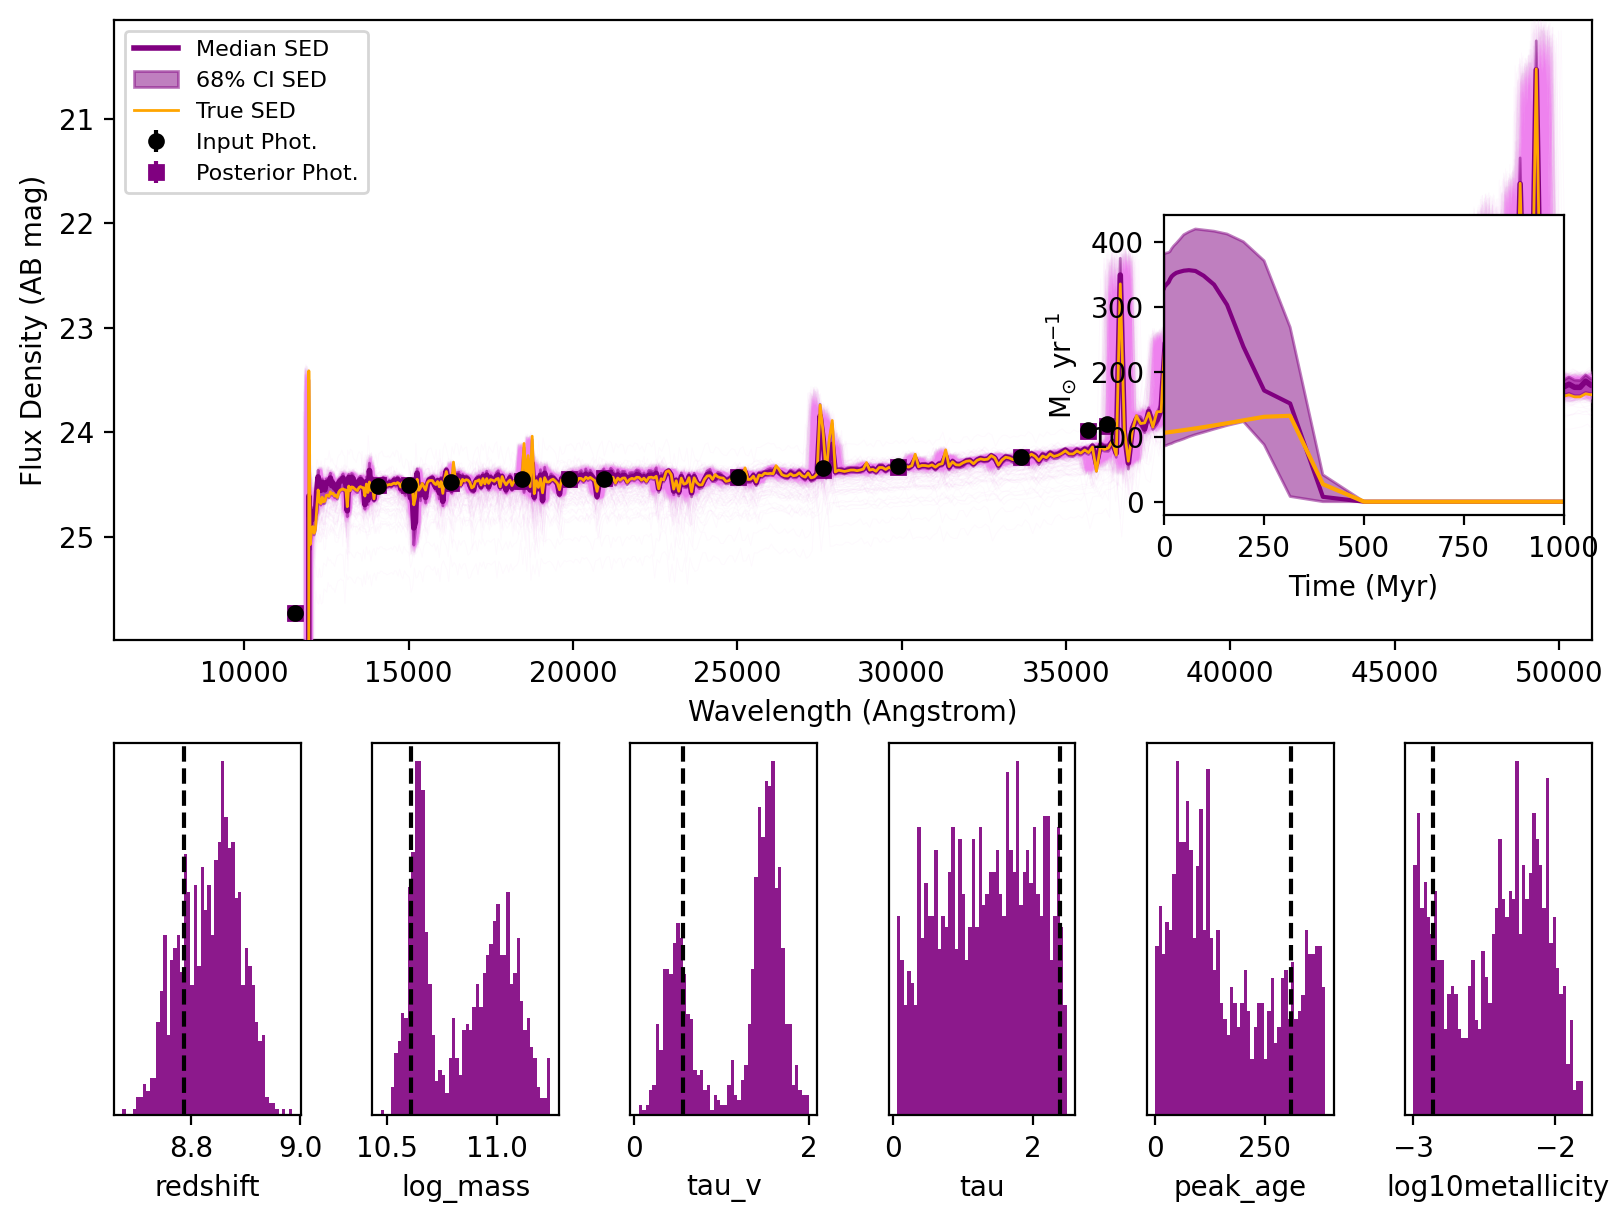

In [304]:
%matplotlib inline

fig = fitter.recover_SED(
    X_test=params,
    simulator=simulator,
    marginalized_parameters=marginalized_parameters,
    true_parameters=fitter.fitted_parameter_array[index, :],
)

fig

In [275]:
for i in range(10):
    index = np.random.choice(fitter._test_indices)
    params = fitter.feature_array[index, :].copy()

    fig = fitter.recover_SED(
        X_test=params,
        simulator=simulator,
        marginalized_parameters=marginalized_parameters,
        true_parameters=fitter.fitted_parameter_array[index, :],
        plot_name=f"recovered_sed_{index}.png",
    )
    plt.show()

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 46


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 33


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 8


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 0


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 38


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 177


ValueError: Axis limits cannot be NaN or Inf

Train a noisy model

In [5]:
fitter = SBI_Fitter.init_from_hdf5(
    "Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v2_ensemble_redshift_nonorm_sbi_noisy",
    grid_path,
    return_output=False,
)

load = True
if load:
    fitter.load_model_from_pkl(
        "/home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v2_ensemble_redshift_nonorm_sbi_noisy"
    )
else:
    # Draw depths from a normal distribution.
    depth_centers = [
        30 if fitter.raw_photometry_names[i].endswith("W") else 29.5
        for i in range(len(fitter.raw_photometry_names))
    ]
    depth_sigma = [
        0.2 if fitter.raw_photometry_names[i].endswith("W") else 0.3
        for i in range(len(fitter.raw_photometry_names))
    ]
    # Draw 20 possible depths from a normal distribution
    depths = np.random.normal(
        loc=depth_centers,
        scale=depth_sigma,
        size=(20, len(fitter.raw_photometry_names)),
    )
    depths_jy = (
        10 ** ((depths - 8.90) / -2.5) * Jy
    )  # 30 AB mag in all 22 filters

    # Set 5 possible options - no missing bands, missing M bands, missing M bands except F410M, missing M bands except F410M and F335M, missing M bands except F410M and F070W
    missing_bands = np.empty((5, len(fitter.raw_photometry_names)))
    missing_bands[0] = 0
    missing_bands[1] = [
        True if band.endswith("M") else False
        for band in fitter.raw_photometry_names
    ]
    missing_bands[2] = [
        True if band.endswith("M") and band not in ["NIRCam.F410M"] else False
        for band in fitter.raw_photometry_names
    ]
    missing_bands[3] = [
        True
        if band.endswith("M") and band not in ["NIRCam.F410M", "NIRCam.F335M"]
        else False
        for band in fitter.raw_photometry_names
    ]
    missing_bands[4] = [
        True
        if (band.endswith("M") and band not in ["NIRCam.F410M"])
        or band == "NIRCam.F070W"
        else False
        for band in fitter.raw_photometry_names
    ]

    fitter.create_feature_array_from_raw_photometry(
        extra_features=[],
        normalize_method=None,
        scatter_fluxes=5,
        include_errors_in_feature_array=True,
        depths=depths_jy,
        simulate_missing_fluxes=False,
        include_flags_in_feature_array=False,
        missing_flux_options=missing_bands,
    )

    fitter.run_single_sbi(
        n_nets=1,
        backend="sbi",
        engine="NPE",
        stop_after_epochs=20,
        hidden_features=[75],
        learning_rate=1e-3,
        num_transforms=[3],
        model_type=["maf"],
    )

Quick test

In [209]:
from synthesizer.parametric import SFH
from unyt import unyt_quantity, Msun, Angstrom, nJy

sfh = {
    "tau": np.float32(1.1300783),
    "peak_age": unyt_quantity(547.21136, dtype=np.float32, units="Myr"),
    "max_age": unyt_quantity(546.58285752, "Myr"),
    "min_age": unyt_quantity(0, "yr"),
}
# sfh= {'tau': np.float32(1.1300783), 'peak_age': unyt_quantity(547.21136, dtype=np.float32, units='Myr'), 'max_age': unyt_quantity(846.58285752, 'Myr'), 'min_age': unyt_quantity(0, 'yr')}


sfh = SFH.LogNormal(**sfh)

# t, sfh = sfh.calculate_sfh()

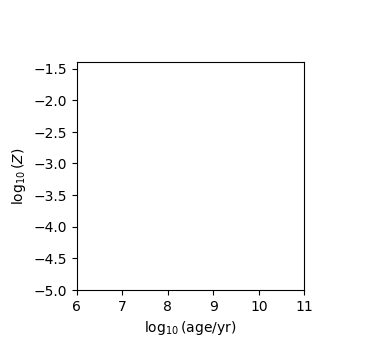

(<Figure size 350x350 with 3 Axes>,
 <Axes: xlabel='$\\log_{10}(\\mathrm{age}/\\mathrm{yr})$', ylabel='$\\log_{10}(Z)$'>)

In [210]:
from synthesizer.parametric import Galaxy
from synthesizer.emission_models import (
    PacmanEmission,
    TotalEmission,
    EmissionModel,
    IntrinsicEmission,
    StellarEmissionModel,
    STELLAR_MODELS,
    IncidentEmission,
)
from synthesizer.emission_models.attenuation import PowerLaw, Calzetti2000
from synthesizer.emissions import plot_spectra
from synthesizer.emission_models.dust.emission import Greybody
from synthesizer.grid import Grid
from synthesizer.parametric import SFH, Stars, ZDist

galaxy = Galaxy(
    redshift=10,
    stars=Stars(
        grid.log10age,
        grid.metallicity,
        sf_hist=sfh,
        initial_mass=1e7 * Msun,
        metal_dist=ZDist.DeltaConstant(log10metallicity=2e-2),
        tau_v=0,
    ),
)

galaxy.stars.plot_sfzh()

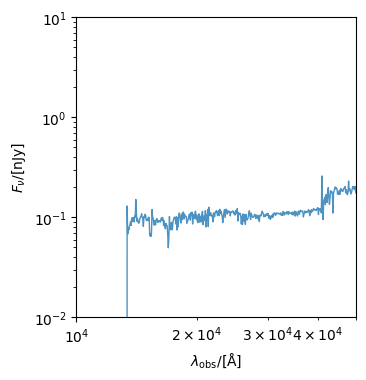

(<Figure size 350x500 with 1 Axes>,
 <Axes: xlabel='$\\lambda_\\mathrm{obs}/[\\mathrm{\\AA}]$', ylabel='$F_{\\nu}/[\\mathrm{\\rm{nJy}}]$'>)

In [207]:
galaxy.stars.get_spectra(emission_model)

galaxy.get_observed_spectra(cosmo=Planck18)

plot_spectra(
    galaxy.stars.spectra["total"],
    quantity_to_plot="fnu",
    show=True,
    xlimits=(10000, 50_000) * Angstrom,
    ylimits=(0.01, 10) * nJy,
)

In [194]:
galaxy.stars.spectra["total"].fnu

unyt_array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       9.66202085e+39, 9.59611655e+39, 9.53220035e+39], shape=(9244,), units='nJy')

Depth is 31.747425010840047 mag(AB)


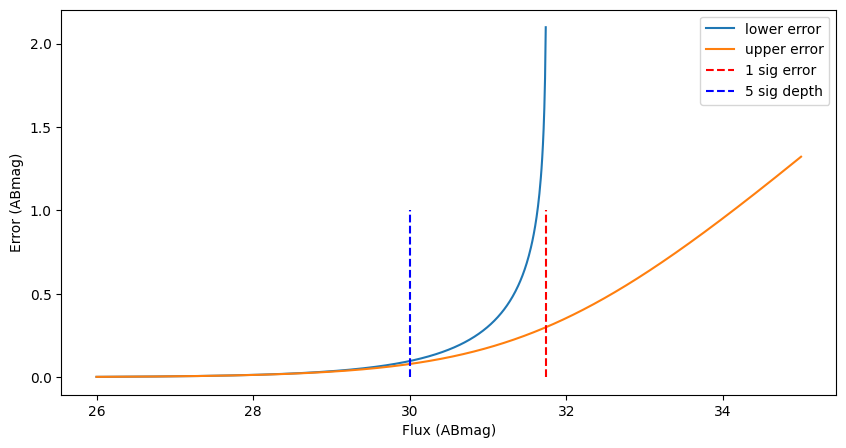

In [270]:
d_njy = depths.to(nJy).value[0]


import astropy.units as u

d = d_njy * u.nJy
d /= 5

print(f"Depth is {d.to(u.ABmag)}")


test_fluxes = np.linspace(26, 35, 1000) * u.ABmag

mag_err_lower = lambda x: np.log10(
    x.to(u.nJy).value / (x.to(u.nJy).value - d.to(u.nJy).value)
)
mag_err_upper = lambda x: np.log10(
    1 + np.abs(d.to(u.nJy).value / x.to(u.nJy).value)
)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(test_fluxes, mag_err_lower(test_fluxes), label="lower error")
ax.plot(test_fluxes, mag_err_upper(test_fluxes), label="upper error")
ax.set_xlabel("Flux (ABmag)")
ax.set_ylabel("Error (ABmag)")
ax.vlines(
    d.to(u.ABmag).value, 0, 1, color="red", linestyle="--", label="1 sig error"
)
ax.vlines(
    (5 * d).to(u.ABmag).value,
    0,
    1,
    color="blue",
    linestyle="--",
    label="5 sig depth",
)
ax.legend()

Let's test a model which can handle missing photometry. We will remove some datapoints randomly from the training set, and also add a binary feature for each band which marks whether the band is missing or not. 

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 1.


---------------------------------------------
Features: 100000 features over 40 samples
---------------------------------------------
Feature: Min - Max
---------------------------------------------
NIRCam.F070W: 21.384 - 99.000 AB
NIRCam.F090W: 19.759 - 99.000 AB
NIRCam.F115W: 20.157 - 99.000 AB
NIRCam.F140M: 19.640 - 99.000 AB
NIRCam.F150W: 19.695 - 99.000 AB
NIRCam.F162M: 19.382 - 99.000 AB
NIRCam.F182M: 19.386 - 99.000 AB
NIRCam.F200W: 19.375 - 99.000 AB
NIRCam.F210M: 19.360 - 99.000 AB
NIRCam.F250M: 19.415 - 99.000 AB
NIRCam.F277W: 19.419 - 99.000 AB
NIRCam.F300M: 19.431 - 99.000 AB
NIRCam.F335M: 18.688 - 99.000 AB
NIRCam.F356W: 19.162 - 99.000 AB
NIRCam.F360M: 18.896 - 99.000 AB
NIRCam.F410M: 19.350 - 99.000 AB
NIRCam.F430M: 18.503 - 99.000 AB
NIRCam.F444W: 19.162 - 99.000 AB
NIRCam.F460M: 18.377 - 99.000 AB
NIRCam.F480M: 19.062 - 99.000 AB
flag_NIRCam.F070W: 0.000 - 1.000 None
flag_NIRCam.F090W: 0.000 - 1.000 None
flag_NIRCam.F115W: 0.000 - 1.000 None
flag_NIRCam.F140M: 0.000 - 

INFO:root:It took 640.9717991352081 seconds to train models.
INFO:root:Saving model to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_missing


 Neural network successfully converged after 174 epochs.Time to train model(s): 0:10:40.991471


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:root:Saving single posterior plot to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_missing/plots/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_missing_3209_plot_single_posterior.jpg...
 26%|██▋       | 5296/20000 [00:49<02:17, 106.66it/s]WARNING:root:Only 0.754% proposal samples are
                    accepted. It may take a long time to collect the remaining
                    -14 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
 30%|██▉       | 5901/20000 [00:55<02:11, 107.62it/s]WARNING:root:Only 0.399% proposal samples are
                    accepted. It may take a long time to collect the remaining
                    -1 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
 70%|███████   | 14074/20000 [02:11<00:54, 107.96it/s]WARNING:r

(EnsemblePosterior sampler for potential_fn=<EnsemblePotential>,
 [{'epochs_trained': [0, 174],
   'best_validation_loss': [inf, 2.024340804100037],
   'validation_loss': [8.363525661468506,
    8.147721021652222,
    7.869173126220703,
    7.635419153213501,
    7.450316967010498,
    7.051619649887085,
    6.514937437057495,
    6.643714838027954,
    6.3443702220916744,
    5.791856620788574,
    5.583021375656128,
    5.289230144500732,
    5.489685930252075,
    5.499226222991943,
    5.446785701751709,
    5.0902557468414305,
    4.890464769363403,
    5.050849954605103,
    4.775337697982788,
    4.867408864974975,
    4.514739216804505,
    4.783029344558716,
    4.624642786979675,
    4.270710587501526,
    4.454463116645813,
    4.495612589836121,
    4.319459131240845,
    4.194451572418213,
    4.419298438072205,
    4.724322855949402,
    4.283473484039306,
    4.550516459465027,
    4.361433652877808,
    4.182337339401245,
    4.2222471504211425,
    4.212205723762512,
 

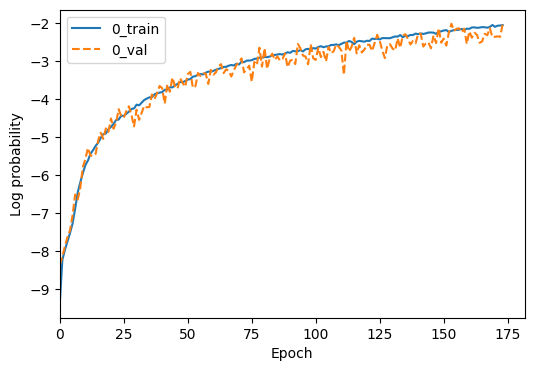

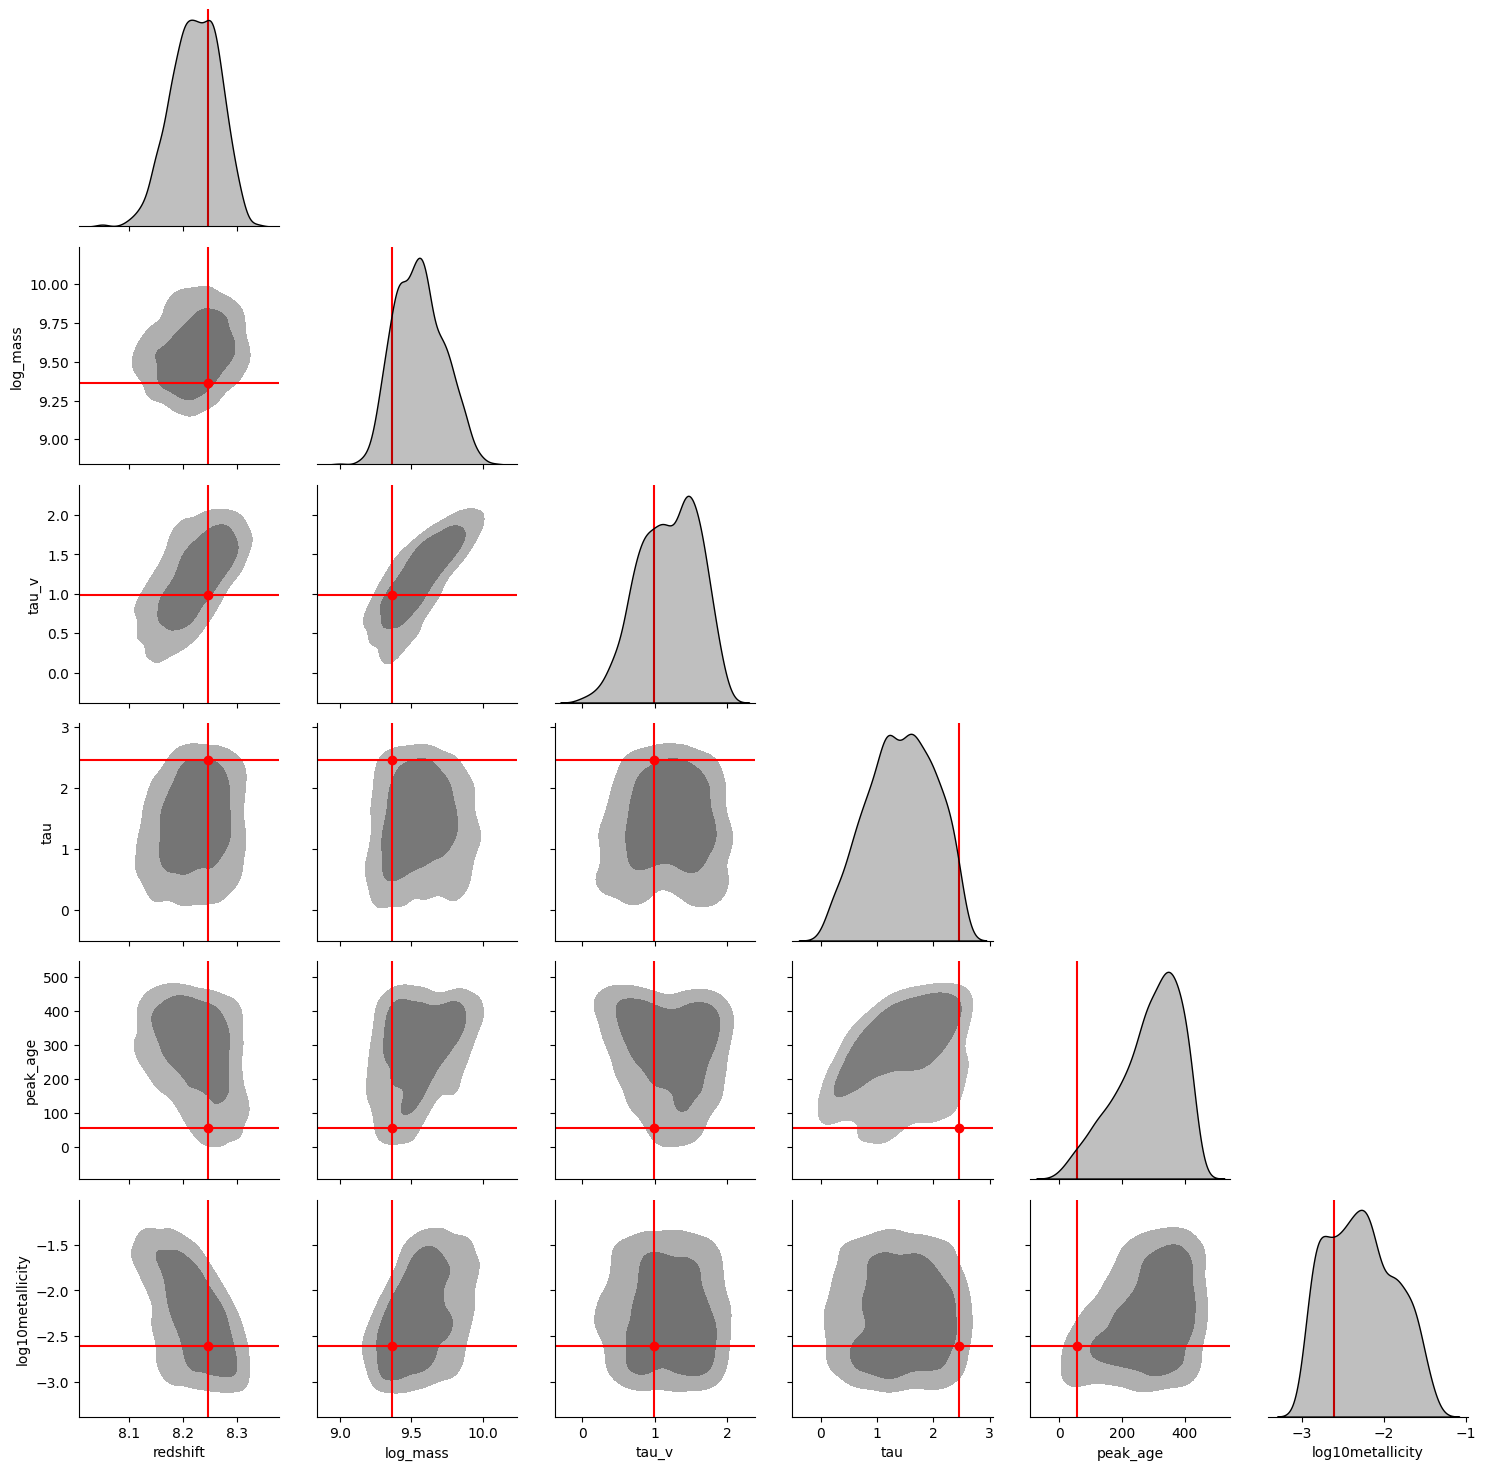

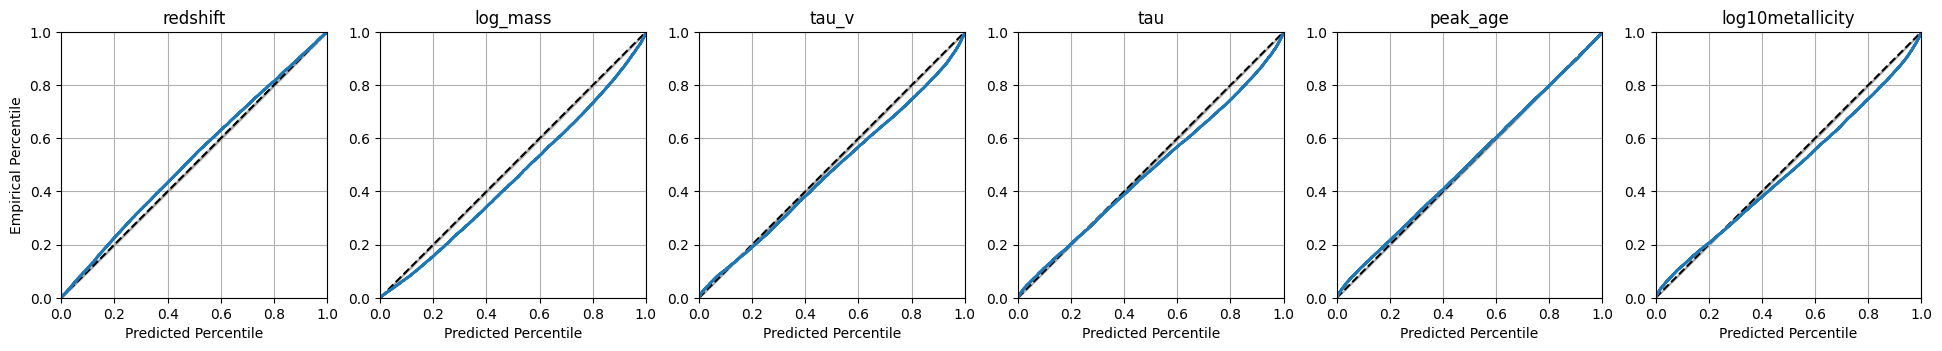

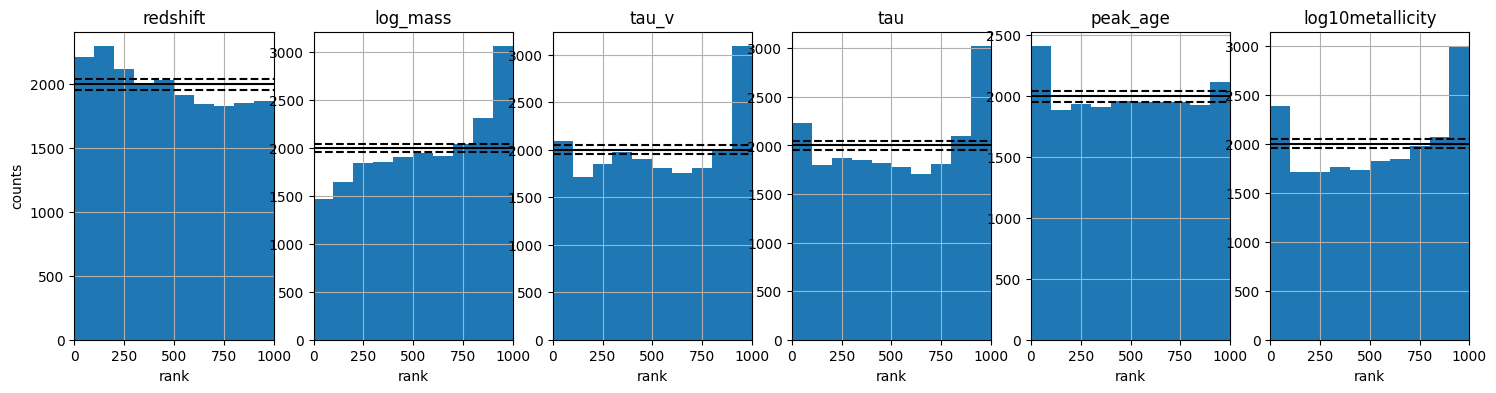

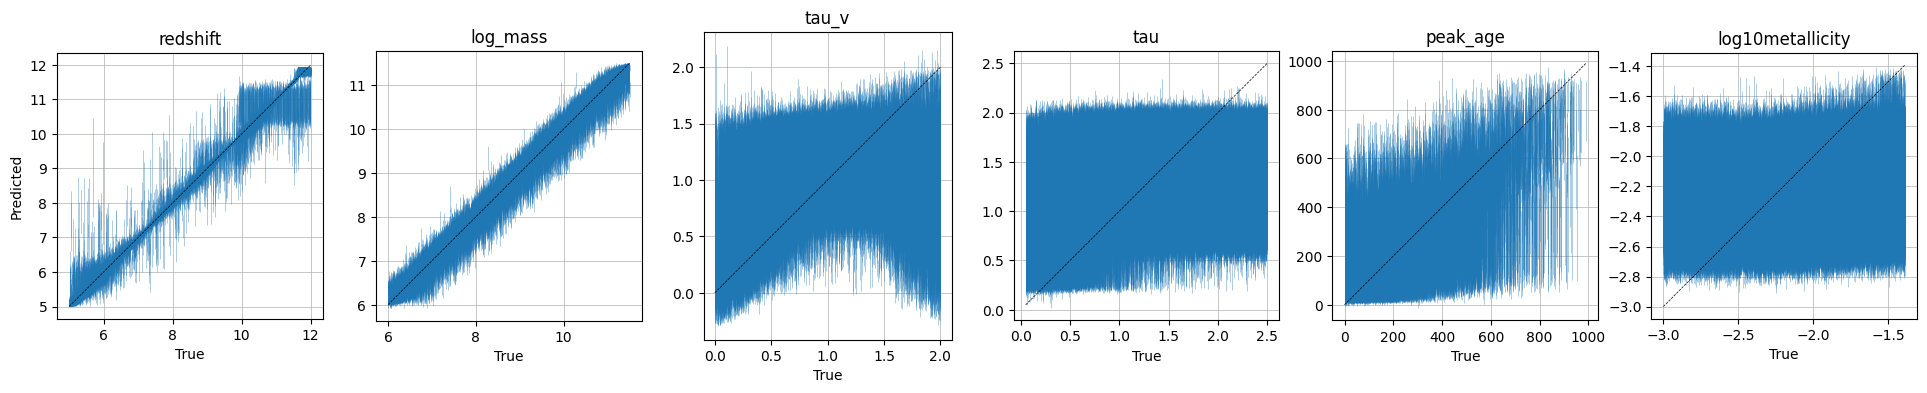

INFO:matplotlib.mathtext:Substituting symbol E from STIXNonUnicode


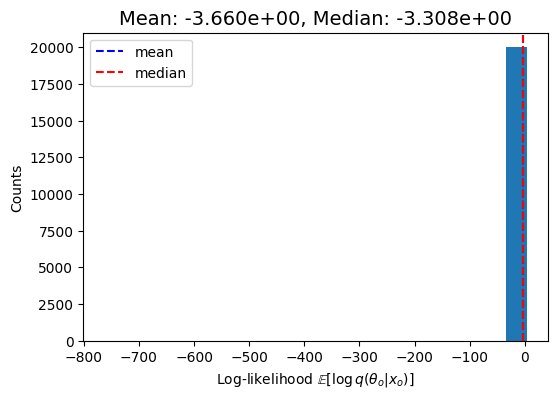

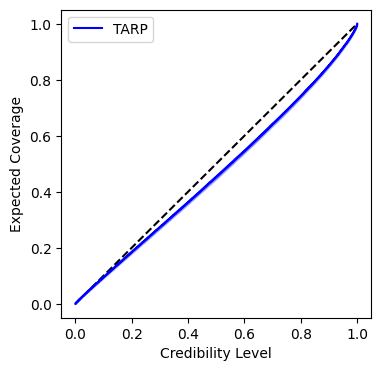

In [320]:
noisy_fitter = SBI_Fitter.init_from_hdf5(
    "Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_missing",
    grid_path,
    return_output=False,
)

noisy_fitter.create_feature_array_from_raw_photometry(
    extra_features=[],
    normalize_method=None,
    include_flags_in_feature_array=True,
    simulate_missing_fluxes=True,
    missing_flux_fraction=0.1,
)

noisy_fitter.run_single_sbi(
    n_nets=1,
    backend="sbi",
    engine="NPE",
    stop_after_epochs=20,
    hidden_features=100,
    learning_rate=1e-3,
    num_transforms=4,
    model_type="maf",
)

In [322]:
index = np.random.choice(noisy_fitter._test_indices)
params = noisy_fitter.feature_array[index, :].copy()
print(params)
fig = noisy_fitter.recover_SED(
    X_test=params,
    simulator=simulator,
    marginalized_parameters=marginalized_parameters,
    true_parameters=noisy_fitter.fitted_parameter_array[index, :],
    plot_name=f"recovered_sed_{index}.png",
)


fig

[50.       50.       50.       43.00669  32.187744 31.13582  30.92179
 99.       30.854404 30.733732 30.742977 30.7627   30.605696 30.529192
 30.506664 99.       30.333115 30.105759 30.016136 29.662819  0.
  0.        0.        0.        0.        0.        0.        1.
  0.        0.        0.        0.        0.        0.        0.
  1.        0.        0.        0.        0.      ]


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 7


Now remove some photometry - here we are removing 6 filter measurements 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 13


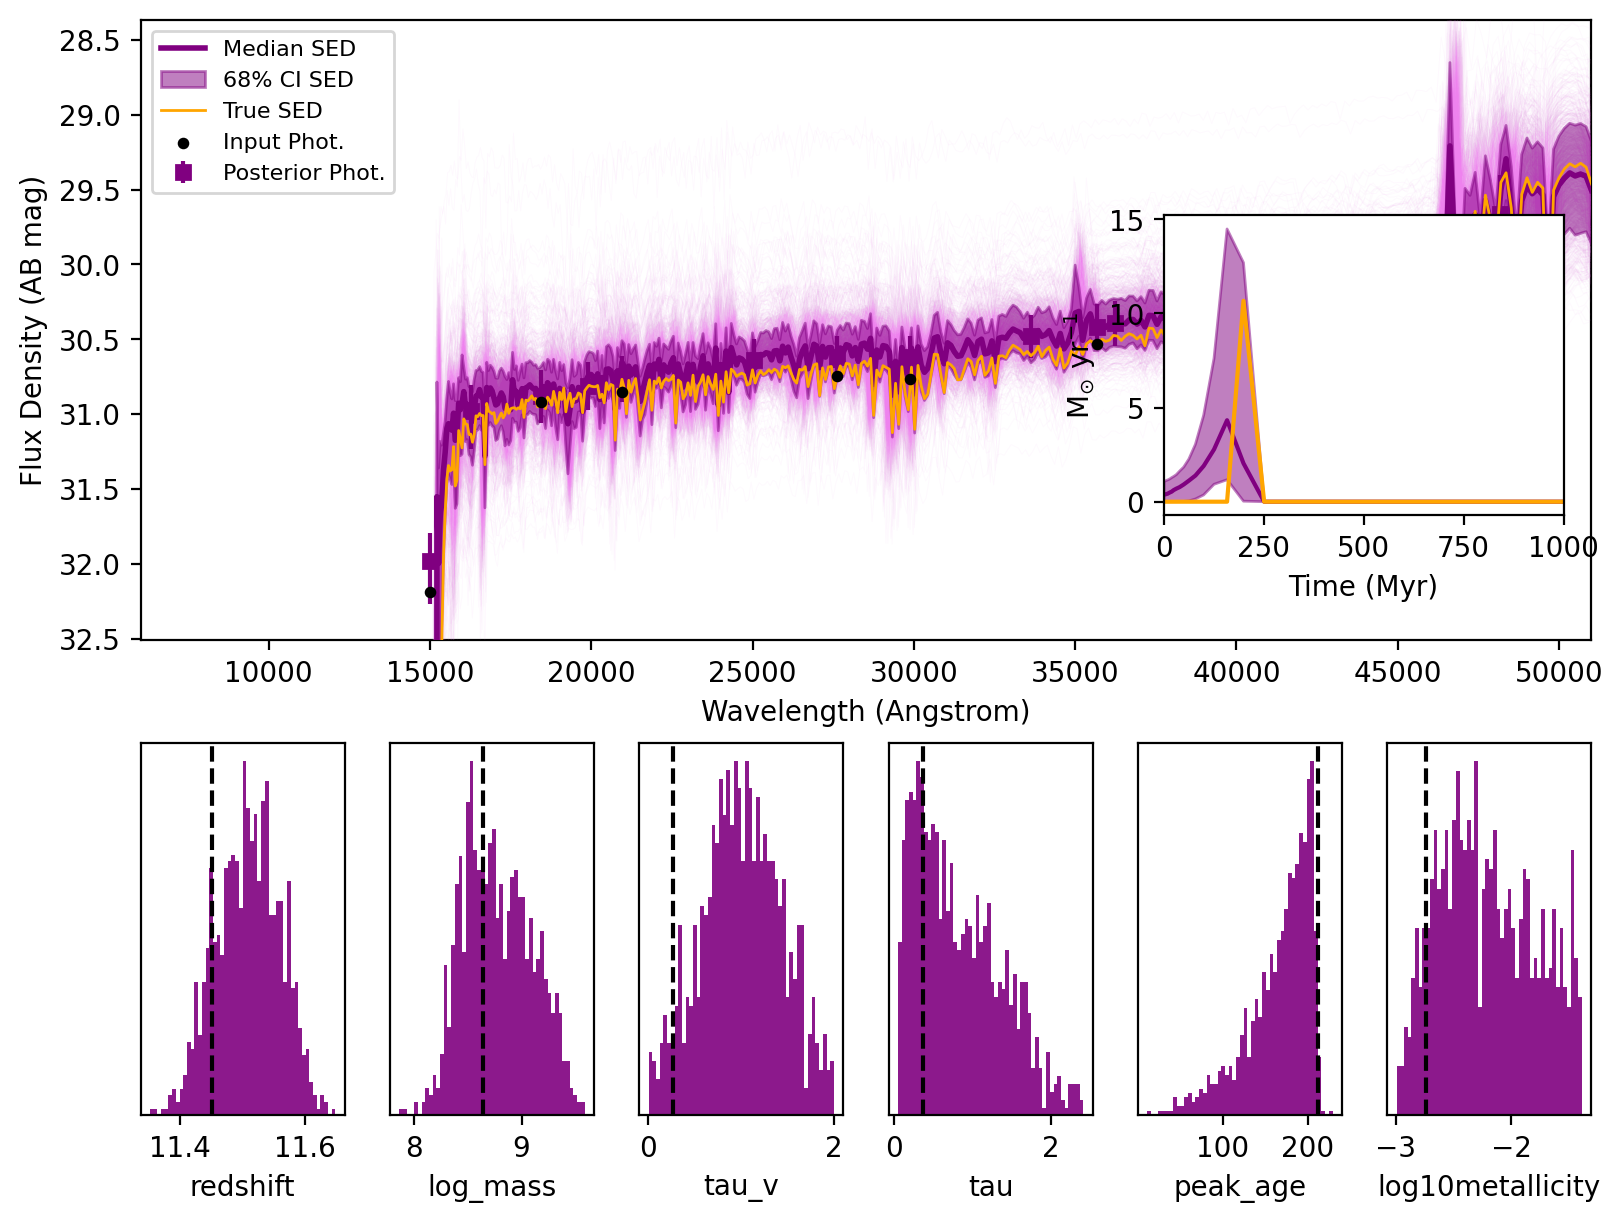

In [326]:
remove_idx = [5, 7, 9, 12, 14, 19]
for remove in remove_idx:
    params[remove] = 99
    params[remove + 20] = 1

fig = noisy_fitter.recover_SED(
    X_test=params,
    simulator=simulator,
    marginalized_parameters=marginalized_parameters,
    true_parameters=noisy_fitter.fitted_parameter_array[index, :],
    plot_name=f"recovered_sed_{index}.png",
)

fig

### Delayed Exponential SFH model with noise


Scattering photometry 5 times for each row
---------------------------------------------
Features: 250000 features over 66 samples
---------------------------------------------
Feature: Min - Max
---------------------------------------------
HST/ACS_WFC.F435W: 13.744 - 50.000 AB
HST/ACS_WFC.F475W: 13.243 - 50.000 AB
HST/ACS_WFC.F606W: 12.371 - 50.000 AB
JWST/NIRCam.F070W: 11.847 - 50.000 AB
HST/ACS_WFC.F775W: 11.617 - 50.000 AB
HST/ACS_WFC.F814W: 11.527 - 50.000 AB
HST/ACS_WFC.F850LP: 11.287 - 50.000 AB
JWST/NIRCam.F090W: 11.287 - 50.000 AB
HST/WFC3_IR.F105W: 10.978 - 50.000 AB
HST/WFC3_IR.F110W: 10.832 - 50.000 AB
JWST/NIRCam.F115W: 10.817 - 50.000 AB
HST/WFC3_IR.F125W: 10.694 - 50.000 AB
JWST/NIRCam.F140M: 10.530 - 50.000 AB
HST/WFC3_IR.F140W: 10.541 - 50.000 AB
JWST/NIRCam.F150W: 10.438 - 50.000 AB
HST/WFC3_IR.F160W: 10.408 - 50.000 AB
JWST/NIRCam.F162M: 10.316 - 50.000 AB
JWST/NIRCam.F182M: 10.316 - 50.000 AB
JWST/NIRCam.F200W: 10.391 - 50.000 AB
JWST/NIRCam.F210M: 10.452 - 50.000 

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 1.


Creating maf network with NPE engine and sbi backend.
     hidden_features: 75
     num_transforms: 3
[2025-05-23 16:33:51,126] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)


 Training neural network. Epochs trained: 147

INFO:root:It took 1112.3359644412994 seconds to train models.
INFO:root:Saving model to /home/tharvey/work/ltu-ili_testing/models/BPASS_DelayedExponential_SFH_0.01_z_12_logN_4.7_Chab_Calzetti_v1_redshift_nonorm_sbi_noisy


 Neural network successfully converged after 148 epochs.Time to train model(s): 0:18:34.184295


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:root:Saving single posterior plot to /home/tharvey/work/ltu-ili_testing/models/BPASS_DelayedExponential_SFH_0.01_z_12_logN_4.7_Chab_Calzetti_v1_redshift_nonorm_sbi_noisy/plots/BPASS_DelayedExponential_SFH_0.01_z_12_logN_4.7_Chab_Calzetti_v1_redshift_nonorm_sbi_noisy_41724_plot_single_posterior.jpg...
100%|██████████| 50000/50000 [07:37<00:00, 109.23it/s] 
INFO:root:Saving coverage plot to /home/tharvey/work/ltu-ili_testing/models/BPASS_DelayedExponential_SFH_0.01_z_12_logN_4.7_Chab_Calzetti_v1_redshift_nonorm_sbi_noisy/plots/plot_coverage.jpg...
INFO:root:Saving ranks histogram to /home/tharvey/work/ltu-ili_testing/models/BPASS_DelayedExponential_SFH_0.01_z_12_logN_4.7_Chab_Calzetti_v1_redshift_nonorm_sbi_noisy/plots/ranks_histogram.jpg...
INFO:root:Mean logprob: -2.0717e+01Median logprob: -5.5928e+00
INFO:root:Saving true logprobs to /home/tharvey/work/ltu-ili_testing/models/BPASS_DelayedExponential_SFH_0.01_z_12_logN_4.7_Chab_Calzetti_v1_redshift_nonorm_sbi_noisy/plots/true_logp

(EnsemblePosterior sampler for potential_fn=<EnsemblePotential>,
 [{'epochs_trained': [0, 148],
   'best_validation_loss': [inf, 5.809353003692627],
   'validation_loss': [14.331899227905273,
    13.74873184967041,
    13.915781712341309,
    12.625272680664063,
    12.528893724060058,
    12.514818096923829,
    10.795611294555664,
    10.463109707641602,
    10.936415000915527,
    10.569821157836914,
    10.585649795532227,
    10.25106371459961,
    9.960510836791991,
    10.065707688903808,
    10.723517114257813,
    9.887077509307861,
    10.348268156433106,
    10.237777543640137,
    9.059144583129882,
    9.226195851135254,
    8.739720552825927,
    9.933862432861329,
    8.645751947021484,
    8.67993009262085,
    8.837688368225098,
    8.920387712097169,
    9.920078823852538,
    8.694884555053711,
    8.502157186889649,
    8.887962895965575,
    8.381367449188232,
    8.417628886413574,
    8.86095829849243,
    7.92030100479126,
    8.096043467712402,
    8.9840881935

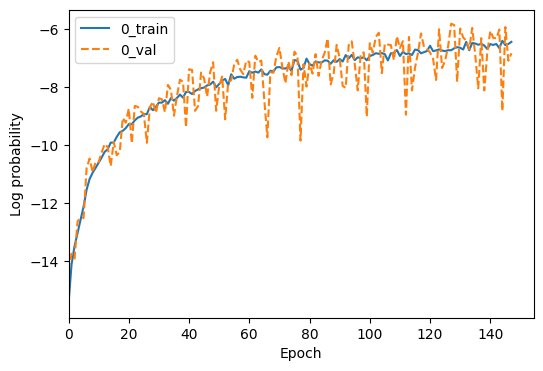

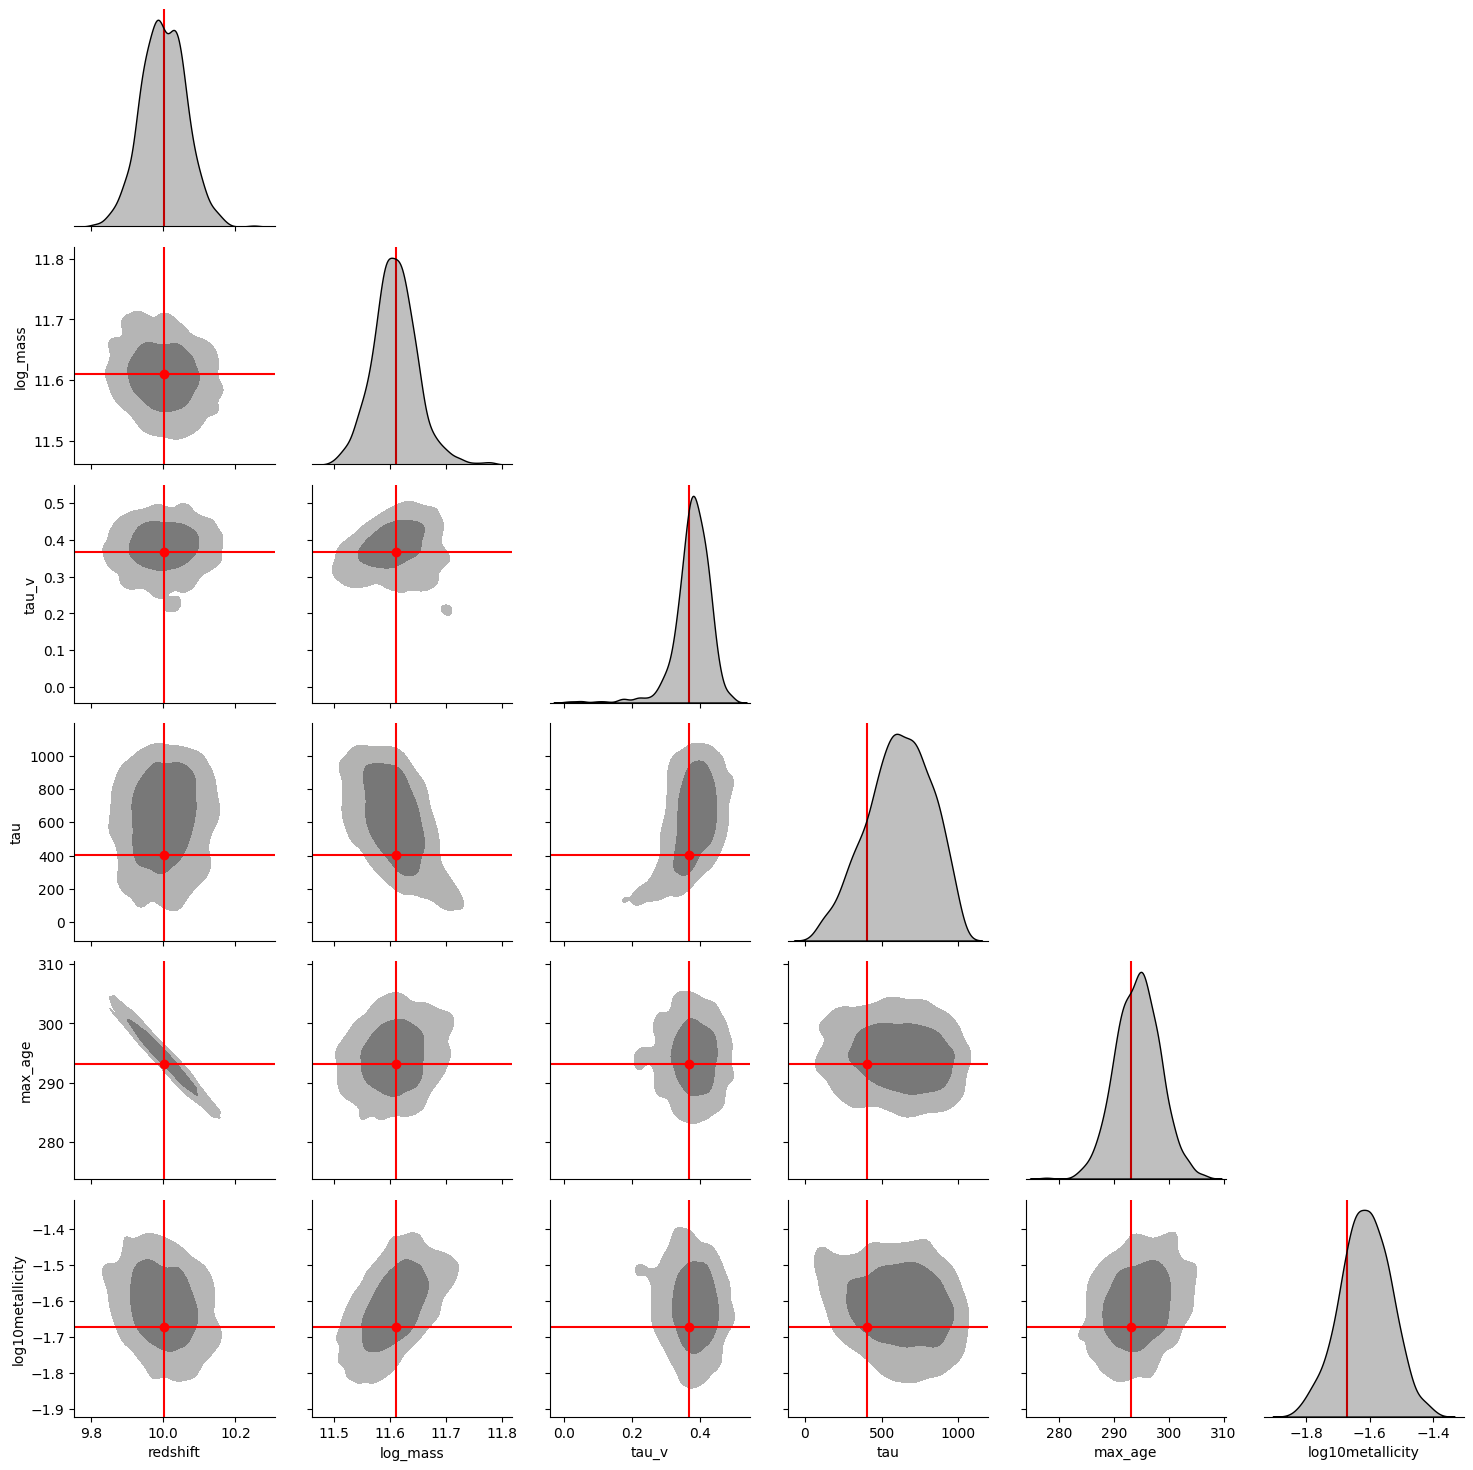

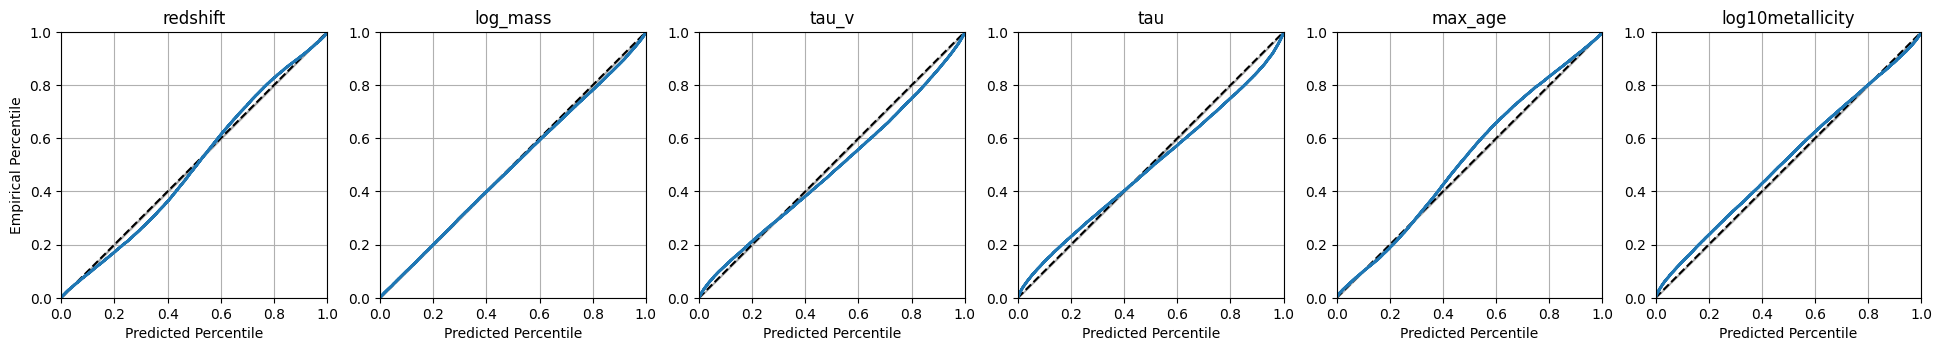

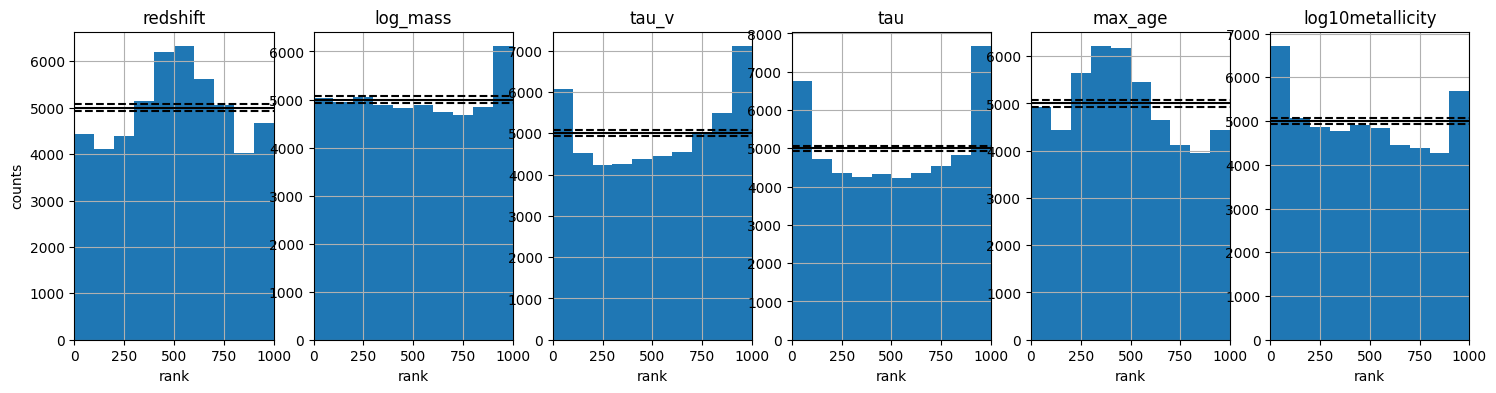

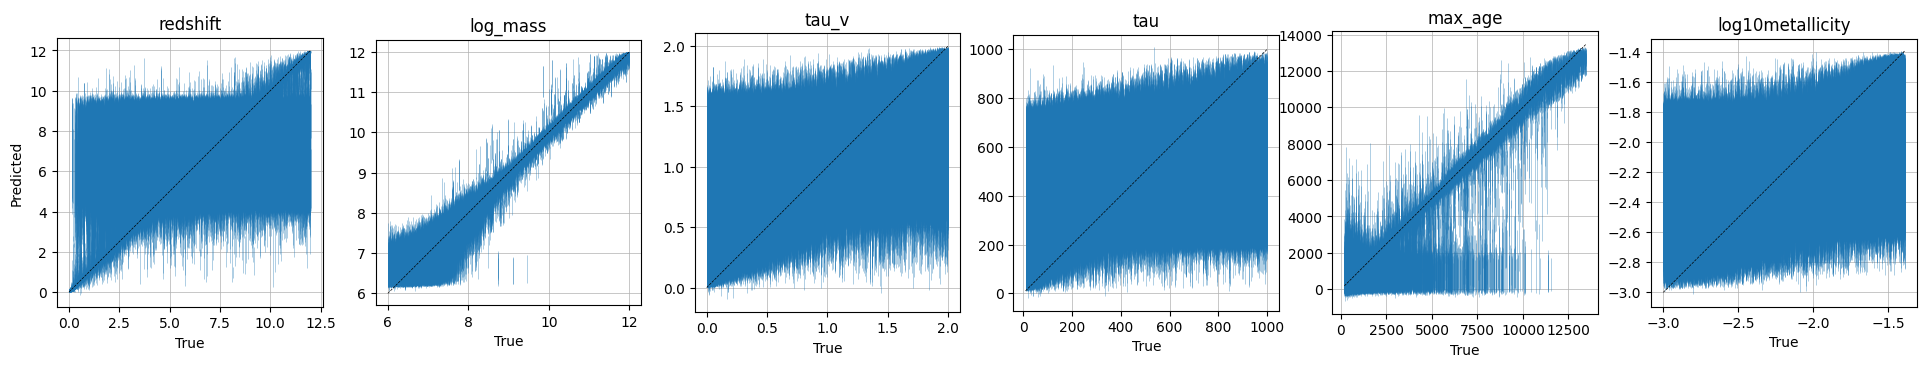

INFO:matplotlib.mathtext:Substituting symbol E from STIXNonUnicode


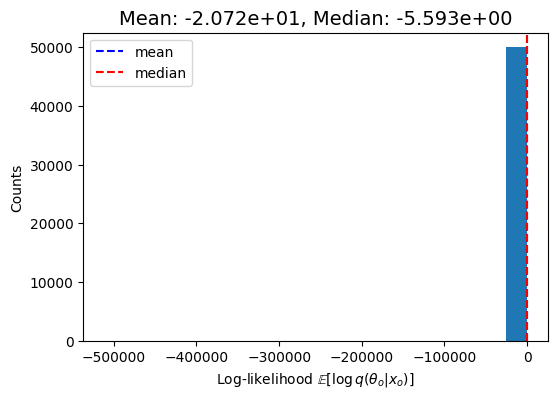

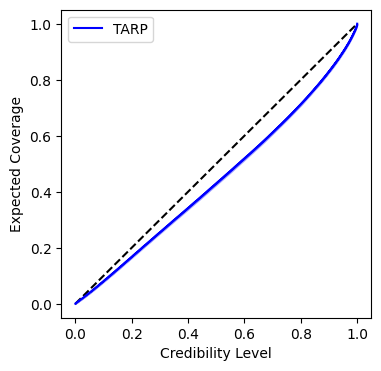

In [6]:
grid_path = "/home/tharvey/work/output/grid_BPASS_DelayedExponential_SFH_0.01_z_12_logN_4.7_Chab_Calzetti_v1.hdf5"

fitter = SBI_Fitter.init_from_hdf5(
    "BPASS_DelayedExponential_SFH_0.01_z_12_logN_4.7_Chab_Calzetti_v1_redshift_nonorm_sbi_noisy",
    grid_path,
    return_output=False,
)

nfilt = len(fitter.raw_photometry_names)

depths = (
    10 ** ((np.array([30] * nfilt) - 8.90) / -2.5) * Jy
)  # 30 AB mag in all 22 filters
fitter.create_feature_array_from_raw_photometry(
    extra_features=[],
    normalize_method=None,
    scatter_fluxes=5,
    include_errors_in_feature_array=True,
    depths=depths,
)

fitter.run_single_sbi(
    n_nets=1,
    backend="sbi",
    engine="NPE",
    stop_after_epochs=20,
    hidden_features=75,
    learning_rate=1e-3,
    num_transforms=3,
    model_type="maf",
)

Model with missing data and photometry

In [4]:
fitter = SBI_Fitter.init_from_hdf5(
    "Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v2_ensemble_redshift_nonorm_sbi_noisy_missing_lampe",
    grid_path,
    return_output=False,
)

load = True
if load:
    fitter.load_model_from_pkl(
        "/home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v2_ensemble_redshift_nonorm_sbi_noisy_missing_lampe"
    )
else:
    # Draw depths from a normal distribution.
    depth_centers = [
        30 if fitter.raw_photometry_names[i].endswith("W") else 29.5
        for i in range(len(fitter.raw_photometry_names))
    ]
    depth_sigma = [
        1.0 if fitter.raw_photometry_names[i].endswith("W") else 1.3
        for i in range(len(fitter.raw_photometry_names))
    ]
    # Draw 20 possible depths from a normal distribution
    depths = np.random.normal(
        loc=depth_centers,
        scale=depth_sigma,
        size=(20, len(fitter.raw_photometry_names)),
    )
    depths_jy = (
        10 ** ((depths - 8.90) / -2.5) * Jy
    )  # 30 AB mag in all 22 filters

    # Set 5 possible options - no missing bands, missing M bands, missing M bands except F410M, missing M bands except F410M and F335M, missing M bands except F410M and F070W
    missing_bands = np.empty((5, len(fitter.raw_photometry_names)))
    missing_bands[0] = 0
    missing_bands[1] = [
        True if band.endswith("M") else False
        for band in fitter.raw_photometry_names
    ]
    missing_bands[2] = [
        True if band.endswith("M") and band not in ["NIRCam.F410M"] else False
        for band in fitter.raw_photometry_names
    ]
    missing_bands[3] = [
        True
        if band.endswith("M") and band not in ["NIRCam.F410M", "NIRCam.F335M"]
        else False
        for band in fitter.raw_photometry_names
    ]
    missing_bands[4] = [
        True
        if (band.endswith("M") and band not in ["NIRCam.F410M"])
        or band == "NIRCam.F070W"
        else False
        for band in fitter.raw_photometry_names
    ]

    fitter.create_feature_array_from_raw_photometry(
        extra_features=[],
        normalize_method=None,
        scatter_fluxes=5,
        include_errors_in_feature_array=True,
        depths=depths_jy,
        simulate_missing_fluxes=True,
        include_flags_in_feature_array=True,
        missing_flux_options=missing_bands,
    )

    fitter.run_single_sbi(
        n_nets=3,
        backend="lampe",
        engine="NPE",
        model_type="nsf",
        stop_after_epochs=20,
        hidden_features=[75, 50, 25],
        learning_rate=1e-4,
        num_transforms=[3, 4, 5],
    )

In [5]:
index = np.random.choice(fitter._test_indices)
index = 87692
params = fitter.feature_array[index, :].copy()

"""
for i, name in enumerate(fitter.feature_names):
    if 'M' in name and 'flag' not in name:
        params[i] = 99
    elif 'M' in name and 'flag' in name:
        params[i] = 1"""

print(params)

[3.3104446e+01 2.6725479e+01 2.4448629e+01 2.4225475e+01 2.4180943e+01
 2.4104979e+01 2.4060537e+01 2.4056677e+01 2.4043327e+01 2.3950018e+01
 2.3833479e+01 2.3677029e+01 2.3382687e+01 2.3347137e+01 2.3346024e+01
 2.3306522e+01 2.3381067e+01 2.3336115e+01 2.3351473e+01 2.3351841e+01
 2.9333416e-01 7.2976383e-03 2.9216020e-04 1.1576127e-04 4.2273090e-04
 1.2406490e-03 1.4696310e-04 2.3113925e-04 4.7027442e-04 2.8513552e-04
 1.6373424e-04 1.1201174e-04 1.5671221e-04 1.5734090e-04 2.0604179e-04
 2.5243367e-04 7.1981974e-04 4.5409767e-04 1.0134101e-04 2.2968664e-04
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


INFO:root:Sampling models with [424, 327, 249] samples each.
Drawing 424 posterior samples: 740it [00:00, 41179.00it/s]            
Drawing 327 posterior samples: 582it [00:00, 25123.86it/s]            
Drawing 249 posterior samples:   0%|          | 0/249 [00:00<?, ?it/s]

Drawing 249 posterior samples: 488it [00:00, 16773.09it/s]            


Number of NaN SFH: 0
Closest draw to tau_v=2 is 1.9938480854034424 at index 826
Full draw: [ 7.109608   11.14512     1.9938481   0.41659874 80.315796   -1.3973647 ]


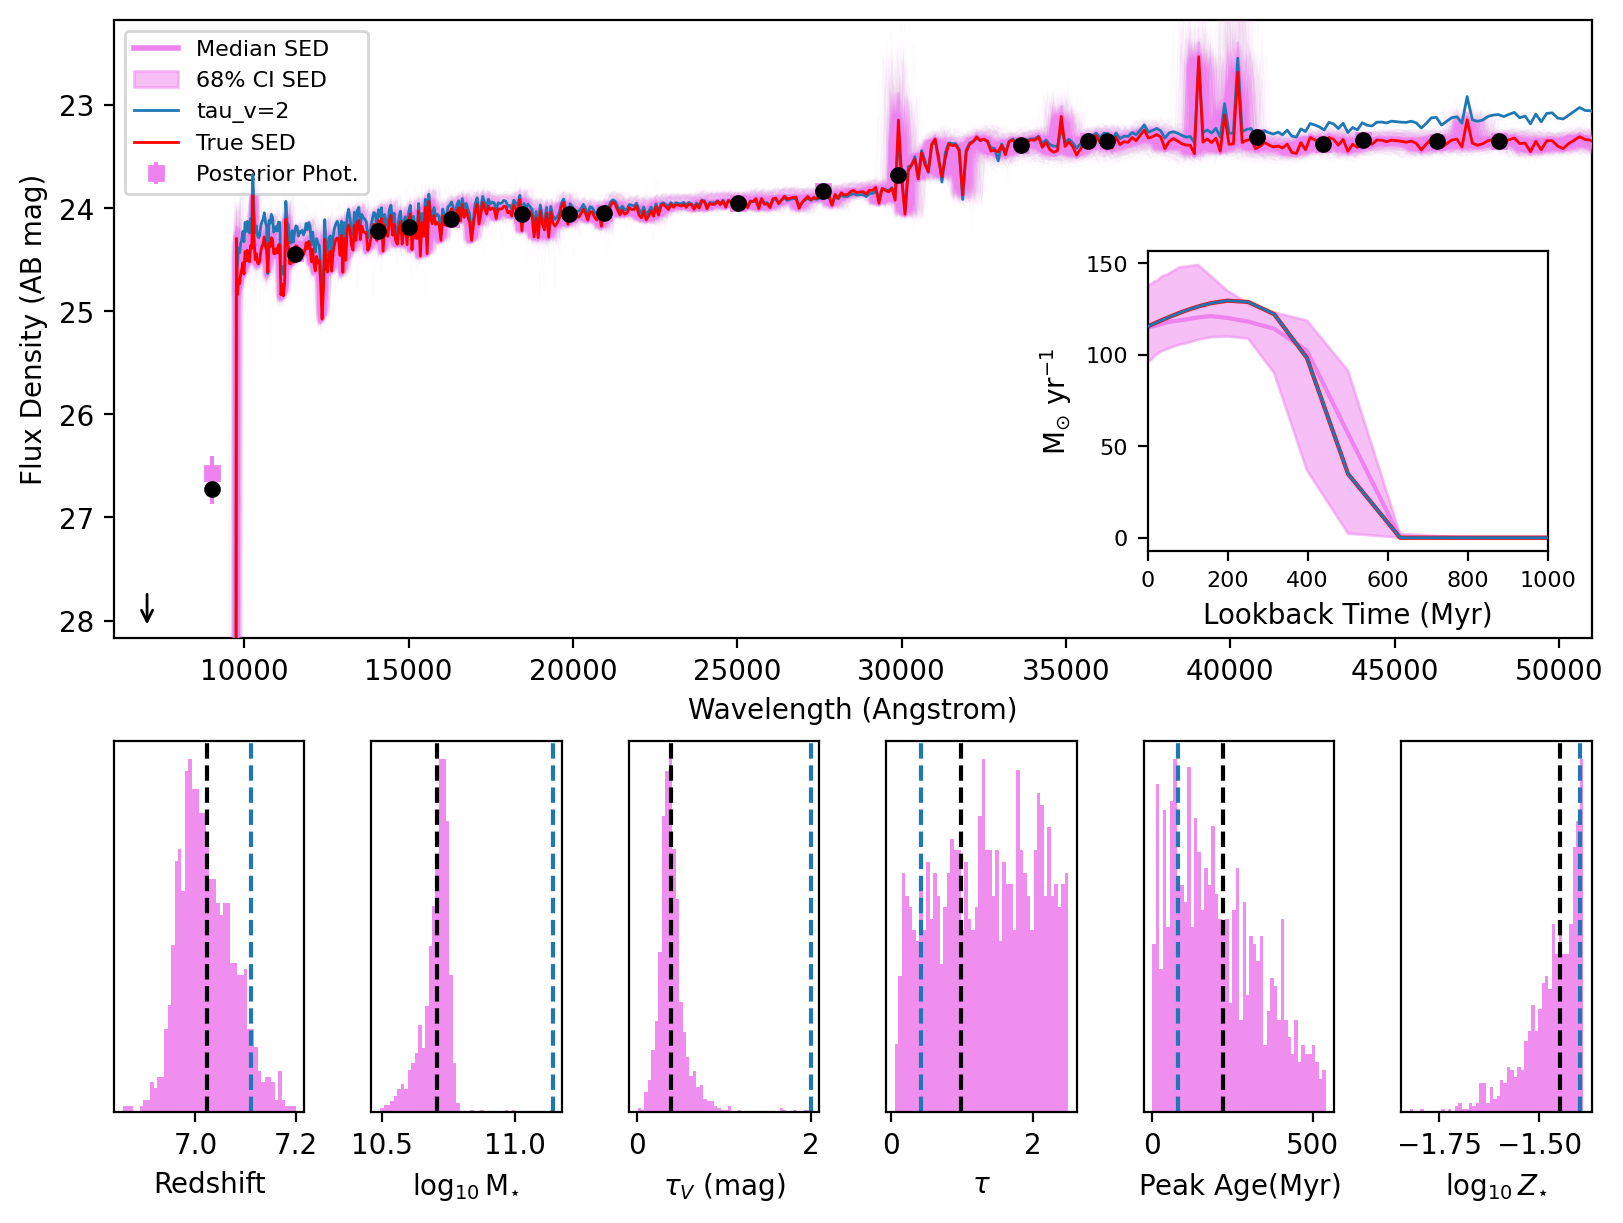

In [9]:
%matplotlib inline
fig = fitter.recover_SED(
    X_test=params,
    simulator=simulator,
    marginalized_parameters=marginalized_parameters,
    true_parameters=fitter.fitted_parameter_array[index, :],
    plot_name=f"recovered_sed_{index}.png",
    plot_closest_draw_to={"tau_v": 2},
    param_labels=[
        "Redshift",
        r"$\log_{10}\rm M_{\star}$",
        r"$\tau_V$ (mag)",
        r"$\tau$",
        r"$\rm Peak\ Age (Myr)$",
        r"$\log_{10} Z_{\star}$",
    ],
)
fig

In [30]:
params = [7.046468, 11.061219, 1.931601, 0.27388036, 73.22359, -1.3983577]
dict = {i: j for i, j in zip(fitter.simple_fitted_parameter_names, params)}
dict["max_age"] = max_age_from_z(dict, max_redshift=20, cosmo=Planck18)

print(dict)
out = simulator(dict)

{'redshift': 7.046468, 'log_mass': 11.061219, 'tau_v': 1.931601, 'tau': 0.27388036, 'peak_age': 73.22359, 'log10metallicity': -1.3983577, 'max_age': np.float64(575.8852120848741)}


In [30]:
grid_path = "/home/tharvey/work/output/grid_Pop_II_LogNormal_SFH_5_z_12_logN_4.7_BPASS_Chab_Calzetti_v1_fesc0.0.hdf5"
model_name = "Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_fesc0.0_ensemble_redshift_nonorm_sbi_lampe"
load = False

fitter = SBI_Fitter.init_from_hdf5(model_name, grid_path, return_output=False)


if load:
    fitter.load_model_from_pkl(
        f"/home/tharvey/work/ltu-ili_testing/models/{model_name}"
    )
else:
    fitter.create_feature_array_from_raw_photometry(
        extra_features=[],
        normalize_method=None,
    )

    fitter.run_single_sbi(
        n_nets=3,
        backend="lampe",
        engine="NPE",
        model_type="nsf",
        stop_after_epochs=20,
        hidden_features=180,
        learning_rate=0.0005,
        num_transforms=5,
    )

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 3.


---------------------------------------------
Features: 50000 features over 20 samples
---------------------------------------------
Feature: Min - Max
---------------------------------------------
JWST/NIRCam.F070W: 21.922 - 50.000 AB
JWST/NIRCam.F090W: 19.601 - 50.000 AB
JWST/NIRCam.F115W: 19.542 - 50.000 AB
JWST/NIRCam.F140M: 19.647 - 50.000 AB
JWST/NIRCam.F150W: 19.668 - 45.010 AB
JWST/NIRCam.F162M: 19.700 - 43.646 AB
JWST/NIRCam.F182M: 19.640 - 42.725 AB
JWST/NIRCam.F200W: 19.688 - 42.507 AB
JWST/NIRCam.F210M: 19.746 - 42.433 AB
JWST/NIRCam.F250M: 19.327 - 41.675 AB
JWST/NIRCam.F277W: 19.509 - 41.444 AB
JWST/NIRCam.F300M: 19.611 - 41.173 AB
JWST/NIRCam.F335M: 18.568 - 40.628 AB
JWST/NIRCam.F356W: 19.085 - 40.403 AB
JWST/NIRCam.F360M: 19.764 - 40.339 AB
JWST/NIRCam.F410M: 19.648 - 39.831 AB
JWST/NIRCam.F430M: 18.929 - 39.443 AB
JWST/NIRCam.F444W: 19.341 - 39.198 AB
JWST/NIRCam.F460M: 19.647 - 39.159 AB
JWST/NIRCam.F480M: 19.447 - 38.693 AB
------------------------------------------

153 epochs [12:02,  4.72s/ epochs, loss=-5.49, loss_val=-5.55]  
INFO:root:Training model 2 / 3.
218 epochs [17:30,  4.82s/ epochs, loss=-6.3, loss_val=-6.53]  
INFO:root:Training model 3 / 3.
163 epochs [13:14,  4.88s/ epochs, loss=-5.55, loss_val=-5.21] 
INFO:root:It took 2567.2994170188904 seconds to train models.
INFO:root:Saving model to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_fesc0.0_ensemble_redshift_nonorm_sbi_lampe
INFO:root:Sampling models with [200, 569, 231] samples each.


Time to train model(s): 0:42:47.460612


Drawing 200 posterior samples: 397it [00:00, 13821.33it/s]            
Drawing 569 posterior samples: 100%|██████████| 569/569 [00:00<00:00, 36993.46it/s]
Drawing 231 posterior samples: 440it [00:00, 14772.46it/s]            
INFO:root:Saving single posterior plot to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_fesc0.0_ensemble_redshift_nonorm_sbi_lampe/plots/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_fesc0.0_ensemble_redshift_nonorm_sbi_lampe_5097_plot_single_posterior.jpg...
 69%|██████▉   | 6911/10000 [09:38<04:05, 12.58it/s]